# Initiative Personal Project 1

## at Generasi GIGIH - Data Analyst Batch 1

# Exploratory Data Analysis_BigTrade

## By Ghazali Akmal Rabbani

# Data Extraction

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ML_2_Fellow.csv')
df

Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0          536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1          536365       71053                  WHITE METAL LANTERN     6.0   
2          536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3          536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4          536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   
...           ...         ...                                  ...     ...   
541904     581587       22613          PACK OF 20 SPACEBOY NAPKINS    12.0   
541905     581587       22899         CHILDREN'S APRON DOLLY GIRL      6.0   
541906     581587       23254        CHILDRENS CUTLERY DOLLY GIRL      4.0   
541907     581587       23255      CHILDRENS CUTLERY CIRCUS PARADE     4.0   
541908     581587       22138        BAKING SET 9 PIECE RETROSPOT      3.0   

       Tanggal_Transaksi  Harga_Satuan  Kode_Pelanggan          Negara  
0         12/1/2010 8:26          2.55         17850.0  United Kingdom  
1         12/1/2010 8:26          3.39         17850.0  United Kingdom  
2         12/1/2010 8:26          2.75         17850.0  United Kingdom  
3         12/1/2010 8:26          3.39         17850.0  United Kingdom  
4         12/1/2010 8:26          3.39         17850.0  United Kingdom  
...                  ...           ...             ...             ...  
541904   12/9/2011 12:50          0.85         12680.0          France  
541905   12/9/2011 12:50          2.10         12680.0          France  
541906   12/9/2011 12:50          4.15         12680.0          France  
541907   12/9/2011 12:50          4.15         12680.0          France  
541908   12/9/2011 12:50          4.95         12680.0          France  

[541909 rows x 8 columns]

# Data Preprocessing

## Separate Date and Time data

In [3]:
df['Jam_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi']).dt.time
df['Tanggal_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi']).dt.date
df

Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0          536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1          536365       71053                  WHITE METAL LANTERN     6.0   
2          536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3          536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4          536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   
...           ...         ...                                  ...     ...   
541904     581587       22613          PACK OF 20 SPACEBOY NAPKINS    12.0   
541905     581587       22899         CHILDREN'S APRON DOLLY GIRL      6.0   
541906     581587       23254        CHILDRENS CUTLERY DOLLY GIRL      4.0   
541907     581587       23255      CHILDRENS CUTLERY CIRCUS PARADE     4.0   
541908     581587       22138        BAKING SET 9 PIECE RETROSPOT      3.0   

       Tanggal_Transaksi  Harga_Satuan  Kode_Pelanggan          Negara  \
0             2010-12-01          2.55         17850.0  United Kingdom   
1             2010-12-01          3.39         17850.0  United Kingdom   
2             2010-12-01          2.75         17850.0  United Kingdom   
3             2010-12-01          3.39         17850.0  United Kingdom   
4             2010-12-01          3.39         17850.0  United Kingdom   
...                  ...           ...             ...             ...   
541904        2011-12-09          0.85         12680.0          France   
541905        2011-12-09          2.10         12680.0          France   
541906        2011-12-09          4.15         12680.0          France   
541907        2011-12-09          4.15         12680.0          France   
541908        2011-12-09          4.95         12680.0          France   

       Jam_Transaksi  
0           08:26:00  
1           08:26:00  
2           08:26:00  
3           08:26:00  
4           08:26:00  
...              ...  
541904      12:50:00  
541905      12:50:00  
541906      12:50:00  
541907      12:50:00  
541908      12:50:00  

[541909 rows x 9 columns]

## Create Total_Pembayaran data as new column in dataframe

In [4]:
df['Total_Pembelian'] = df['Jumlah']*df['Harga_Satuan']
df

Kode_Bayar Kode_Barang                               Barang  Jumlah  \
0          536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.0   
1          536365       71053                  WHITE METAL LANTERN     6.0   
2          536365      84406B       CREAM CUPID HEARTS COAT HANGER     8.0   
3          536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.0   
4          536365      84029E       RED WOOLLY HOTTIE WHITE HEART.     6.0   
...           ...         ...                                  ...     ...   
541904     581587       22613          PACK OF 20 SPACEBOY NAPKINS    12.0   
541905     581587       22899         CHILDREN'S APRON DOLLY GIRL      6.0   
541906     581587       23254        CHILDRENS CUTLERY DOLLY GIRL      4.0   
541907     581587       23255      CHILDRENS CUTLERY CIRCUS PARADE     4.0   
541908     581587       22138        BAKING SET 9 PIECE RETROSPOT      3.0   

       Tanggal_Transaksi  Harga_Satuan  Kode_Pelanggan          Negara  \
0             2010-12-01          2.55         17850.0  United Kingdom   
1             2010-12-01          3.39         17850.0  United Kingdom   
2             2010-12-01          2.75         17850.0  United Kingdom   
3             2010-12-01          3.39         17850.0  United Kingdom   
4             2010-12-01          3.39         17850.0  United Kingdom   
...                  ...           ...             ...             ...   
541904        2011-12-09          0.85         12680.0          France   
541905        2011-12-09          2.10         12680.0          France   
541906        2011-12-09          4.15         12680.0          France   
541907        2011-12-09          4.15         12680.0          France   
541908        2011-12-09          4.95         12680.0          France   

       Jam_Transaksi  Total_Pembelian  
0           08:26:00            15.30  
1           08:26:00            20.34  
2           08:26:00            22.00  
3           08:26:00            20.34  
4           08:26:00            20.34  
...              ...              ...  
541904      12:50:00            10.20  
541905      12:50:00            12.60  
541906      12:50:00            16.60  
541907      12:50:00            16.60  
541908      12:50:00            14.85  

[541909 rows x 10 columns]

# Re-arrange Column Position in dataframe

In [5]:
df = df[['Kode_Bayar','Tanggal_Transaksi','Jam_Transaksi','Kode_Barang','Barang','Jumlah','Harga_Satuan','Total_Pembelian','Kode_Pelanggan','Negara']]
df

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
0          536365        2010-12-01      08:26:00      85123A   
1          536365        2010-12-01      08:26:00       71053   
2          536365        2010-12-01      08:26:00      84406B   
3          536365        2010-12-01      08:26:00      84029G   
4          536365        2010-12-01      08:26:00      84029E   
...           ...               ...           ...         ...   
541904     581587        2011-12-09      12:50:00       22613   
541905     581587        2011-12-09      12:50:00       22899   
541906     581587        2011-12-09      12:50:00       23254   
541907     581587        2011-12-09      12:50:00       23255   
541908     581587        2011-12-09      12:50:00       22138   

                                     Barang  Jumlah  Harga_Satuan  \
0        WHITE HANGING HEART T-LIGHT HOLDER     6.0          2.55   
1                       WHITE METAL LANTERN     6.0          3.39   
2            CREAM CUPID HEARTS COAT HANGER     8.0          2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE     6.0          3.39   
4            RED WOOLLY HOTTIE WHITE HEART.     6.0          3.39   
...                                     ...     ...           ...   
541904          PACK OF 20 SPACEBOY NAPKINS    12.0          0.85   
541905         CHILDREN'S APRON DOLLY GIRL      6.0          2.10   
541906        CHILDRENS CUTLERY DOLLY GIRL      4.0          4.15   
541907      CHILDRENS CUTLERY CIRCUS PARADE     4.0          4.15   
541908        BAKING SET 9 PIECE RETROSPOT      3.0          4.95   

        Total_Pembelian  Kode_Pelanggan          Negara  
0                 15.30         17850.0  United Kingdom  
1                 20.34         17850.0  United Kingdom  
2                 22.00         17850.0  United Kingdom  
3                 20.34         17850.0  United Kingdom  
4                 20.34         17850.0  United Kingdom  
...                 ...             ...             ...  
541904            10.20         12680.0          France  
541905            12.60         12680.0          France  
541906            16.60         12680.0          France  
541907            16.60         12680.0          France  
541908            14.85         12680.0          France  

[541909 rows x 10 columns]

# Summary Statistical Analysis

## Information Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Tanggal_Transaksi  535874 non-null  object 
 2   Jam_Transaksi      535874 non-null  object 
 3   Kode_Barang        535874 non-null  object 
 4   Barang             534420 non-null  object 
 5   Jumlah             535874 non-null  float64
 6   Harga_Satuan       535874 non-null  float64
 7   Total_Pembelian    535874 non-null  float64
 8   Kode_Pelanggan     403182 non-null  float64
 9   Negara             535874 non-null  object 
dtypes: float64(4), object(6)
memory usage: 41.3+ MB


Based on the summary information in the above, there are **4 columns with float type (float64)** which denotes **Numerical Column** and **6 columns with object type** which denotes **Categorical Column**. And also there are **541909 data**

In [7]:
df.isnull().all()

Kode_Bayar           False
Tanggal_Transaksi    False
Jam_Transaksi        False
Kode_Barang          False
Barang               False
Jumlah               False
Harga_Satuan         False
Total_Pembelian      False
Kode_Pelanggan       False
Negara               False
dtype: bool

There is no missing value in this dataset

## Statistical Numerical Analysis

In [8]:
df.describe()

Jumlah   Harga_Satuan  Total_Pembelian  Kode_Pelanggan
count  535874.000000  535874.000000    535874.000000   403182.000000
mean        9.587927       4.636533        18.066343    15287.687868
std       153.292222      97.302232       197.929775     1714.009551
min    -74215.000000  -11062.060000    -77183.600000    12346.000000
25%         1.000000       1.250000         3.480000    13952.000000
50%         3.000000       2.080000         9.840000    15152.000000
75%        10.000000       4.130000        17.400000    16791.000000
max     74215.000000   38970.000000     77183.600000    18287.000000



*   **Count** is a total data of each column
*   **Mean** is an average of all the numbers
*   **std** or Standard Deviation is measurement to tell how a set of values spread out from their mean. A low Standard Deviation whows that the values are close to the mean and a high Standard Deviation shows a high diversion from the mean



### Analyze the result of Statistical Numerical Analysis 

Based on Statistical Numerical Analysis table result in above, column 'Jumlah' has a negative value, which it is a suspect transaction as a normal transaction between buyer and the company of BigTrade. Because the dataset column name is little bit ambiguous, I assume that 'Jumlah' is a quantity of things which bought by a customer. So it means, if there is negative value in 'Jumlah' column, the company has give a things for customer and I assume that is a cost of the company to treat the customer satisfaction

In [9]:
testmin_Jumlah=df[df['Jumlah']==-74215.0]
testmin_Jumlah

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
61624    C541433        2011-01-18      10:17:00       23166   

                               Barang   Jumlah  Harga_Satuan  Total_Pembelian  \
61624  MEDIUM CERAMIC TOP STORAGE JAR -74215.0          1.04         -77183.6   

       Kode_Pelanggan          Negara  
61624         12346.0  United Kingdom

testmin_Jumlah is a data which has maximum negative value in 'Jumlah' Column

### Create New Dataframe to collect negative value in Jumlah column

NegativeValueJumlah is a dataframe which has negative value in 'Jumlah' column or it can be called as Cost of Company

In [10]:
NegativeValueJumlah = df[df['Jumlah'] < 0]
NegativeValueJumlah

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
141       C536379        2010-12-01      09:41:00           D   
154       C536383        2010-12-01      09:49:00      35004C   
235       C536391        2010-12-01      10:24:00       22556   
236       C536391        2010-12-01      10:24:00       21984   
237       C536391        2010-12-01      10:24:00       21983   
...           ...               ...           ...         ...   
540449    C581490        2011-12-09      09:57:00       23144   
541541    C581499        2011-12-09      10:28:00           M   
541715    C581568        2011-12-09      11:57:00       21258   
541716    C581569        2011-12-09      11:58:00       84978   
541717    C581569        2011-12-09      11:58:00       20979   

                                  Barang  Jumlah  Harga_Satuan  \
141                             Discount    -1.0         27.50   
154      SET OF 3 COLOURED  FLYING DUCKS    -1.0          4.65   
235       PLASTERS IN TIN CIRCUS PARADE    -12.0          1.65   
236     PACK OF 12 PINK PAISLEY TISSUES    -24.0          0.29   
237     PACK OF 12 BLUE PAISLEY TISSUES    -24.0          0.29   
...                                  ...     ...           ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL   -11.0          0.83   
541541                            Manual    -1.0        224.69   
541715        VICTORIAN SEWING BOX LARGE    -5.0         10.95   
541716  HANGING HEART JAR T-LIGHT HOLDER    -1.0          1.25   
541717     36 PENCILS TUBE RED RETROSPOT    -5.0          1.25   

        Total_Pembelian  Kode_Pelanggan          Negara  
141              -27.50         14527.0  United Kingdom  
154               -4.65         15311.0  United Kingdom  
235              -19.80         17548.0  United Kingdom  
236               -6.96         17548.0  United Kingdom  
237               -6.96         17548.0  United Kingdom  
...                 ...             ...             ...  
540449            -9.13         14397.0  United Kingdom  
541541          -224.69         15498.0  United Kingdom  
541715           -54.75         15311.0  United Kingdom  
541716            -1.25         17315.0  United Kingdom  
541717            -6.25         17315.0  United Kingdom  

[10545 rows x 10 columns]

In [11]:
dfDiscount = NegativeValueJumlah[NegativeValueJumlah['Kode_Barang']=='D']
dfDiscount

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang    Barang  \
141       C536379        2010-12-01      09:41:00           D  Discount   
9038      C537164        2010-12-05      13:21:00           D  Discount   
14498     C537597        2010-12-07      12:34:00           D  Discount   
19392     C537857        2010-12-08      16:00:00           D  Discount   
31134     C538897        2010-12-15      09:14:00           D  Discount   
...           ...               ...           ...         ...       ...   
479868    C577227        2011-11-18      12:06:00           D  Discount   
479869    C577227        2011-11-18      12:06:00           D  Discount   
493613    C578239        2011-11-23      12:29:00           D  Discount   
516221    C579884        2011-11-30      17:34:00           D  Discount   
516455    C579908        2011-12-01      08:49:00           D  Discount   

        Jumlah  Harga_Satuan  Total_Pembelian  Kode_Pelanggan          Negara  
141       -1.0         27.50           -27.50         14527.0  United Kingdom  
9038      -1.0         29.29           -29.29         14527.0  United Kingdom  
14498     -1.0        281.00          -281.00         15498.0  United Kingdom  
19392     -1.0        267.12          -267.12         17340.0  United Kingdom  
31134     -1.0          5.76            -5.76         16422.0  United Kingdom  
...        ...           ...              ...             ...             ...  
479868    -1.0         19.82           -19.82         14527.0  United Kingdom  
479869    -1.0         16.76           -16.76         14527.0  United Kingdom  
493613    -1.0         26.33           -26.33         14912.0           Italy  
516221    -1.0         20.53           -20.53         14527.0  United Kingdom  
516455    -1.0         28.68           -28.68         14527.0  United Kingdom  

[77 rows x 10 columns]

dfDiscount is a dataframe which contain Discount data in the dataframe. So I know how much the company give a discount to the customer

In [12]:
dfManual = NegativeValueJumlah[NegativeValueJumlah['Kode_Barang']=='M']
dfManual

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  Barang  Jumlah  \
14716     C537610        2010-12-07      13:23:00           M  Manual    -1.0   
14728     C537613        2010-12-07      13:28:00           M  Manual    -1.0   
21758     C538124        2010-12-09      15:43:00           M  Manual    -4.0   
23241     C538189        2010-12-10      10:35:00           M  Manual    -1.0   
28993     C538681        2010-12-13      17:12:00           M  Manual    -1.0   
...           ...               ...           ...         ...     ...     ...   
520134    C580263        2011-12-02      12:43:00           M  Manual   -16.0   
523375    C580510        2011-12-04      13:48:00           M  Manual    -1.0   
533082    C581009        2011-12-07      09:15:00           M  Manual    -1.0   
534308    C581145        2011-12-07      13:48:00           M  Manual    -1.0   
541541    C581499        2011-12-09      10:28:00           M  Manual    -1.0   

        Harga_Satuan  Total_Pembelian  Kode_Pelanggan          Negara  
14716         631.31          -631.31             NaN  United Kingdom  
14728         313.78          -313.78             NaN  United Kingdom  
21758           0.50            -2.00         15329.0  United Kingdom  
23241         133.08          -133.08             NaN  United Kingdom  
28993         316.30          -316.30             NaN  United Kingdom  
...              ...              ...             ...             ...  
520134          0.29            -4.64         12536.0          France  
523375          1.25            -1.25         14456.0  United Kingdom  
533082        125.00          -125.00         16971.0  United Kingdom  
534308          9.95            -9.95         17490.0  United Kingdom  
541541        224.69          -224.69         15498.0  United Kingdom  

[244 rows x 10 columns]

dfManual dataframe is a collection of data that I assume is cost of company to give a treat customer by manually such as giving a cashback in cash/manual way to the customer

### Analyze negative value in Harga Satuan column

In [13]:
testmin_HargaSatuan = df[df['Harga_Satuan']== -11062.06]
testmin_HargaSatuan

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
299983    A563186        2011-08-12      14:51:00           B   
299984    A563187        2011-08-12      14:52:00           B   

                 Barang  Jumlah  Harga_Satuan  Total_Pembelian  \
299983  Adjust bad debt     1.0     -11062.06        -11062.06   
299984  Adjust bad debt     1.0     -11062.06        -11062.06   

        Kode_Pelanggan          Negara  
299983             NaN  United Kingdom  
299984             NaN  United Kingdom

In [14]:
NegativeValueHargaSatuan = df[df['Harga_Satuan'] < 0]
NegativeValueHargaSatuan

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
299983    A563186        2011-08-12      14:51:00           B   
299984    A563187        2011-08-12      14:52:00           B   

                 Barang  Jumlah  Harga_Satuan  Total_Pembelian  \
299983  Adjust bad debt     1.0     -11062.06        -11062.06   
299984  Adjust bad debt     1.0     -11062.06        -11062.06   

        Kode_Pelanggan          Negara  
299983             NaN  United Kingdom  
299984             NaN  United Kingdom

In [15]:
test_Barang = df[df['Barang'] == 'Adjust bad debt']
test_Barang

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
299982    A563185        2011-08-12      14:50:00           B   
299983    A563186        2011-08-12      14:51:00           B   
299984    A563187        2011-08-12      14:52:00           B   

                 Barang  Jumlah  Harga_Satuan  Total_Pembelian  \
299982  Adjust bad debt     1.0      11062.06         11062.06   
299983  Adjust bad debt     1.0     -11062.06        -11062.06   
299984  Adjust bad debt     1.0     -11062.06        -11062.06   

        Kode_Pelanggan          Negara  
299982             NaN  United Kingdom  
299983             NaN  United Kingdom  
299984             NaN  United Kingdom

From the result in above negative value is from adjustment of bad debt the customer

**What is a Bad Debt?**
A bad debt is a receivable that a customer will not pay. Bad debts are possible whenever credit is extended to customers. They arise under the following circumstances:

1. When a company extends too much credit to a customer that is incapable of paying back the debt, resulting in either a delayed, reduced, or missing payment.
2. When a customer misrepresents itself in obtaining a sale on credit, and has no intent of ever paying the seller.

The first situation is caused by bad internal processes or changes in the ability of a customer to pay. The second situation is caused by a customer intentionally engaging in fraud.

# Exploratory Data Analysis on Profit Condition of Company

from result analysis in above, profit condition of company can be taken from condition where Jumlah is more than 0. Because it is purely income transaction to the company from customer who bought the things

## Create new Dataframe where Jumlah is more than 0

In [16]:
dfProfitCompany = df[df['Jumlah'] >= 0]
dfProfitCompany

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
0          536365        2010-12-01      08:26:00      85123A   
1          536365        2010-12-01      08:26:00       71053   
2          536365        2010-12-01      08:26:00      84406B   
3          536365        2010-12-01      08:26:00      84029G   
4          536365        2010-12-01      08:26:00      84029E   
...           ...               ...           ...         ...   
541904     581587        2011-12-09      12:50:00       22613   
541905     581587        2011-12-09      12:50:00       22899   
541906     581587        2011-12-09      12:50:00       23254   
541907     581587        2011-12-09      12:50:00       23255   
541908     581587        2011-12-09      12:50:00       22138   

                                     Barang  Jumlah  Harga_Satuan  \
0        WHITE HANGING HEART T-LIGHT HOLDER     6.0          2.55   
1                       WHITE METAL LANTERN     6.0          3.39   
2            CREAM CUPID HEARTS COAT HANGER     8.0          2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE     6.0          3.39   
4            RED WOOLLY HOTTIE WHITE HEART.     6.0          3.39   
...                                     ...     ...           ...   
541904          PACK OF 20 SPACEBOY NAPKINS    12.0          0.85   
541905         CHILDREN'S APRON DOLLY GIRL      6.0          2.10   
541906        CHILDRENS CUTLERY DOLLY GIRL      4.0          4.15   
541907      CHILDRENS CUTLERY CIRCUS PARADE     4.0          4.15   
541908        BAKING SET 9 PIECE RETROSPOT      3.0          4.95   

        Total_Pembelian  Kode_Pelanggan          Negara  
0                 15.30         17850.0  United Kingdom  
1                 20.34         17850.0  United Kingdom  
2                 22.00         17850.0  United Kingdom  
3                 20.34         17850.0  United Kingdom  
4                 20.34         17850.0  United Kingdom  
...                 ...             ...             ...  
541904            10.20         12680.0          France  
541905            12.60         12680.0          France  
541906            16.60         12680.0          France  
541907            16.60         12680.0          France  
541908            14.85         12680.0          France  

[525329 rows x 10 columns]

In [17]:
df

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
0          536365        2010-12-01      08:26:00      85123A   
1          536365        2010-12-01      08:26:00       71053   
2          536365        2010-12-01      08:26:00      84406B   
3          536365        2010-12-01      08:26:00      84029G   
4          536365        2010-12-01      08:26:00      84029E   
...           ...               ...           ...         ...   
541904     581587        2011-12-09      12:50:00       22613   
541905     581587        2011-12-09      12:50:00       22899   
541906     581587        2011-12-09      12:50:00       23254   
541907     581587        2011-12-09      12:50:00       23255   
541908     581587        2011-12-09      12:50:00       22138   

                                     Barang  Jumlah  Harga_Satuan  \
0        WHITE HANGING HEART T-LIGHT HOLDER     6.0          2.55   
1                       WHITE METAL LANTERN     6.0          3.39   
2            CREAM CUPID HEARTS COAT HANGER     8.0          2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE     6.0          3.39   
4            RED WOOLLY HOTTIE WHITE HEART.     6.0          3.39   
...                                     ...     ...           ...   
541904          PACK OF 20 SPACEBOY NAPKINS    12.0          0.85   
541905         CHILDREN'S APRON DOLLY GIRL      6.0          2.10   
541906        CHILDRENS CUTLERY DOLLY GIRL      4.0          4.15   
541907      CHILDRENS CUTLERY CIRCUS PARADE     4.0          4.15   
541908        BAKING SET 9 PIECE RETROSPOT      3.0          4.95   

        Total_Pembelian  Kode_Pelanggan          Negara  
0                 15.30         17850.0  United Kingdom  
1                 20.34         17850.0  United Kingdom  
2                 22.00         17850.0  United Kingdom  
3                 20.34         17850.0  United Kingdom  
4                 20.34         17850.0  United Kingdom  
...                 ...             ...             ...  
541904            10.20         12680.0          France  
541905            12.60         12680.0          France  
541906            16.60         12680.0          France  
541907            16.60         12680.0          France  
541908            14.85         12680.0          France  

[541909 rows x 10 columns]

In [18]:
NegativeValueJumlah

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
141       C536379        2010-12-01      09:41:00           D   
154       C536383        2010-12-01      09:49:00      35004C   
235       C536391        2010-12-01      10:24:00       22556   
236       C536391        2010-12-01      10:24:00       21984   
237       C536391        2010-12-01      10:24:00       21983   
...           ...               ...           ...         ...   
540449    C581490        2011-12-09      09:57:00       23144   
541541    C581499        2011-12-09      10:28:00           M   
541715    C581568        2011-12-09      11:57:00       21258   
541716    C581569        2011-12-09      11:58:00       84978   
541717    C581569        2011-12-09      11:58:00       20979   

                                  Barang  Jumlah  Harga_Satuan  \
141                             Discount    -1.0         27.50   
154      SET OF 3 COLOURED  FLYING DUCKS    -1.0          4.65   
235       PLASTERS IN TIN CIRCUS PARADE    -12.0          1.65   
236     PACK OF 12 PINK PAISLEY TISSUES    -24.0          0.29   
237     PACK OF 12 BLUE PAISLEY TISSUES    -24.0          0.29   
...                                  ...     ...           ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL   -11.0          0.83   
541541                            Manual    -1.0        224.69   
541715        VICTORIAN SEWING BOX LARGE    -5.0         10.95   
541716  HANGING HEART JAR T-LIGHT HOLDER    -1.0          1.25   
541717     36 PENCILS TUBE RED RETROSPOT    -5.0          1.25   

        Total_Pembelian  Kode_Pelanggan          Negara  
141              -27.50         14527.0  United Kingdom  
154               -4.65         15311.0  United Kingdom  
235              -19.80         17548.0  United Kingdom  
236               -6.96         17548.0  United Kingdom  
237               -6.96         17548.0  United Kingdom  
...                 ...             ...             ...  
540449            -9.13         14397.0  United Kingdom  
541541          -224.69         15498.0  United Kingdom  
541715           -54.75         15311.0  United Kingdom  
541716            -1.25         17315.0  United Kingdom  
541717            -6.25         17315.0  United Kingdom  

[10545 rows x 10 columns]

In [19]:
dfOther = df[~((df['Jumlah'] < 0) | (df['Jumlah'] > 0))]
dfOther

Kode_Bayar Tanggal_Transaksi  \
109     536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/...               NaT   
253     536394,21506,"FANCY FONT BIRTHDAY CARD, ",24,1...               NaT   
871     536477,22041,"RECORD FRAME 7"" SINGLE SIZE ",4...               NaT   
956     536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2...               NaT   
1014    536520,21111,"SWISS ROLL TOWEL, CHOCOLATE  SPO...               NaT   
...                                                   ...               ...   
541379  581498,22041,"RECORD FRAME 7"" SINGLE SIZE ",2...               NaT   
541549  581501,22165,"DIAMANTE HEART SHAPED WALL MIRRO...               NaT   
541614  581516,21111,"SWISS ROLL TOWEL, CHOCOLATE  SPO...               NaT   
541649  581538,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" ...               NaT   
541787  581578,21506,"FANCY FONT BIRTHDAY CARD, ",12,1...               NaT   

       Jam_Transaksi Kode_Barang Barang  Jumlah  Harga_Satuan  \
109              NaT         NaN    NaN     NaN           NaN   
253              NaT         NaN    NaN     NaN           NaN   
871              NaT         NaN    NaN     NaN           NaN   
956              NaT         NaN    NaN     NaN           NaN   
1014             NaT         NaN    NaN     NaN           NaN   
...              ...         ...    ...     ...           ...   
541379           NaT         NaN    NaN     NaN           NaN   
541549           NaT         NaN    NaN     NaN           NaN   
541614           NaT         NaN    NaN     NaN           NaN   
541649           NaT         NaN    NaN     NaN           NaN   
541787           NaT         NaN    NaN     NaN           NaN   

        Total_Pembelian  Kode_Pelanggan Negara  
109                 NaN             NaN    NaN  
253                 NaN             NaN    NaN  
871                 NaN             NaN    NaN  
956                 NaN             NaN    NaN  
1014                NaN             NaN    NaN  
...                 ...             ...    ...  
541379              NaN             NaN    NaN  
541549              NaN             NaN    NaN  
541614              NaN             NaN    NaN  
541649              NaN             NaN    NaN  
541787              NaN             NaN    NaN  

[6035 rows x 10 columns]

After recounting and reanalyze total of the dataframe that has created, it found that there are 6035 null dataset/broken dataset which I called as dfOther dataframe. So dfOther will not be analyzed in the future. It can be abandoned or it can be dropped before create a machine learning model

## Statistical Numerical Analysis

In [20]:
dfProfitCompany.describe()

Jumlah   Harga_Satuan  Total_Pembelian  Kode_Pelanggan
count  525329.000000  525329.000000    525329.000000   394343.000000
mean       10.508264       3.874437        19.813977    15294.324923
std       111.237553      42.044577       142.131668     1713.606332
min         1.000000  -11062.060000    -11062.060000    12346.000000
25%         1.000000       1.250000         3.750000    13969.000000
50%         3.000000       2.080000         9.900000    15159.000000
75%        10.000000       4.130000        17.700000    16795.000000
max     74215.000000   13541.330000     77183.600000    18287.000000

### Drop negative value data in Harga_Satuan

In [21]:
dataDrop_index = dfProfitCompany[dfProfitCompany['Harga_Satuan']== -11062.06].index
dfProfitCompany.drop(dataDrop_index, inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
dfProfitCompany.describe()

Jumlah   Harga_Satuan  Total_Pembelian  Kode_Pelanggan
count  525327.000000  525327.000000    525327.000000   394343.000000
mean       10.508301       3.916567        19.856167    15294.324923
std       111.237764      36.076946       140.477531     1713.606332
min         1.000000       0.000000         0.000000    12346.000000
25%         1.000000       1.250000         3.750000    13969.000000
50%         3.000000       2.080000         9.900000    15159.000000
75%        10.000000       4.130000        17.700000    16795.000000
max     74215.000000   13541.330000     77183.600000    18287.000000

### Get list of Float and Object Column

In [23]:
dfProfitCompany_float = dfProfitCompany.select_dtypes(include=['float64']).columns.tolist()
dfProfitCompany_float

['Jumlah', 'Harga_Satuan', 'Total_Pembelian', 'Kode_Pelanggan']

In [28]:
dfProfitCompany_category = dfProfitCompany.select_dtypes(include=['object']).columns.tolist()
dfProfitCompany_category

['Kode_Bayar',
 'Tanggal_Transaksi',
 'Jam_Transaksi',
 'Kode_Barang',
 'Barang',
 'Negara']

## Statistical Categorical Analysis

In [29]:
dfProfitCompany_category_describe = dfProfitCompany[dfProfitCompany_category]

In [30]:
dfProfitCompany_category_describe.describe()

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
count      525327            525327        525327      525327   
unique      20714               305           741        3866   
top        573585        2011-12-05      15:56:00      85123A   
freq         1101              5230          2574        2270   

                                    Barang          Negara  
count                               524735          525327  
unique                                3971              38  
top     WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom  
freq                                  2327          480599



*   **count** is total data of each column
*   **unique** is total of unique data in each column.
*   **top** is the most frequency or mode data in each column
*   **freq** is total of top data or mode data in each column.



## Create Boxplot Function to Check Outliers

In [32]:
def boxplot_dfProfitCompany(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(dfProfitCompany[numerical]).set_title(numerical)
    median = dfProfitCompany[numerical].median()
    FirstQuartile = dfProfitCompany[numerical].quantile(0.25)
    ThirdQuartile = dfProfitCompany[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(dfProfitCompany[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(dfProfitCompany[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Float Univariate Analysis

### Jumlah Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  3.0
1st Quartile :  1.0
3rd Quartile :  10.0
IQR :  9.0
Upper Fence :  23.5
Lower Fence :  -12.5

Outliers Data Detection
Upper Outliers Data :  [24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


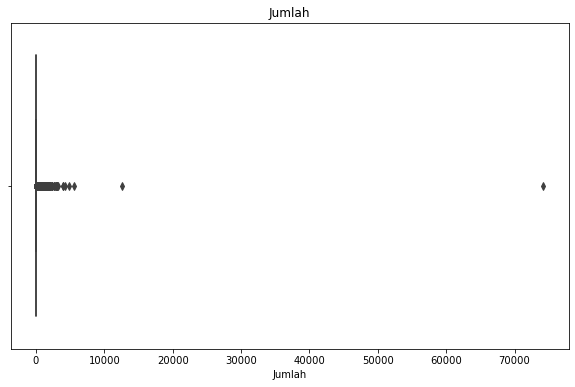

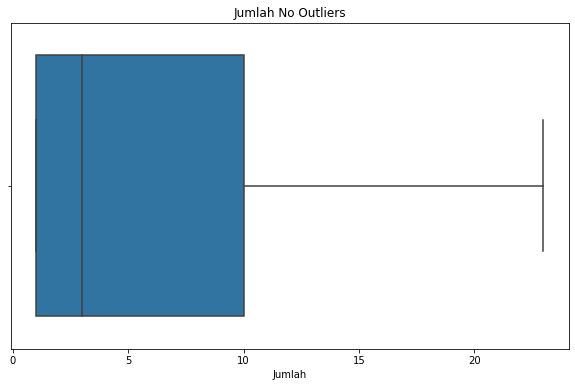

In [33]:
boxplot_dfProfitCompany(dfProfitCompany_float[0])

### Harga Satuan Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  2.08
1st Quartile :  1.25
3rd Quartile :  4.13
IQR :  2.88
Upper Fence :  8.45
Lower Fence :  -3.0700000000000003

Outliers Data Detection
Upper Outliers Data :  [8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47, 8.47

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


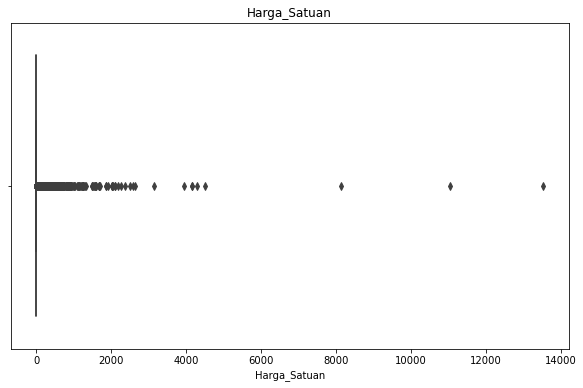

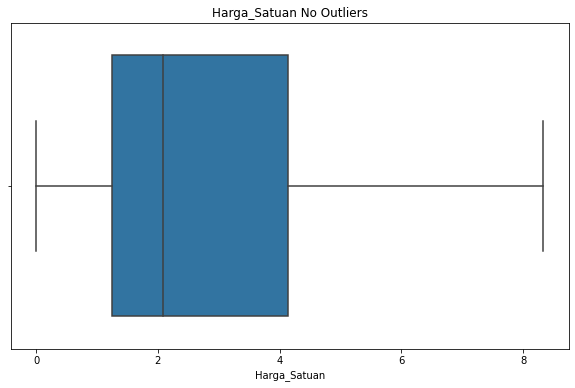

In [34]:
boxplot_dfProfitCompany(dfProfitCompany_float[1])

### Total Pembelian Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  9.9
1st Quartile :  3.75
3rd Quartile :  17.700000000000003
IQR :  13.950000000000003
Upper Fence :  38.62500000000001
Lower Fence :  -17.175000000000004

Outliers Data Detection
Upper Outliers Data :  [38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.7, 38.71, 38.75, 38.87, 38.879999999999995, 38.879999999999995, 38.879999999999995, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


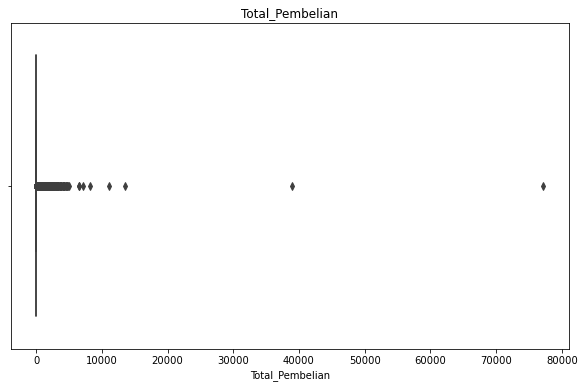

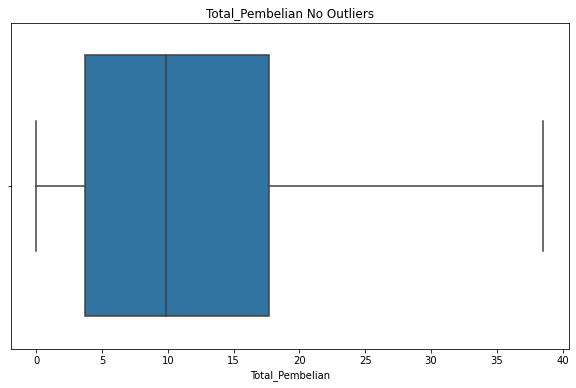

In [35]:
boxplot_dfProfitCompany(dfProfitCompany_float[2])

### Kode Pelanggan Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  15159.0
1st Quartile :  13969.0
3rd Quartile :  16795.0
IQR :  nan
Upper Fence :  nan
Lower Fence :  nan

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


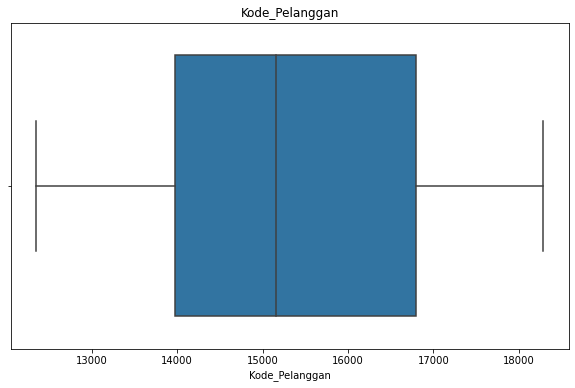

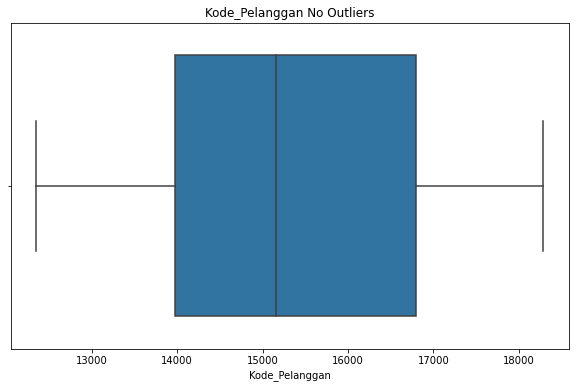

In [36]:
boxplot_dfProfitCompany(dfProfitCompany_float[3])

## Barplot Function

In [38]:
def barplot_dfProfitCompany(data):
    barplot_data = dfProfitCompany[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title( data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )
    
    plt.figure(figsize=(15,8))
    smallest5 = barplot_data.nsmallest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = smallest5,
        order = smallest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Least 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

### Jumlah Barplot

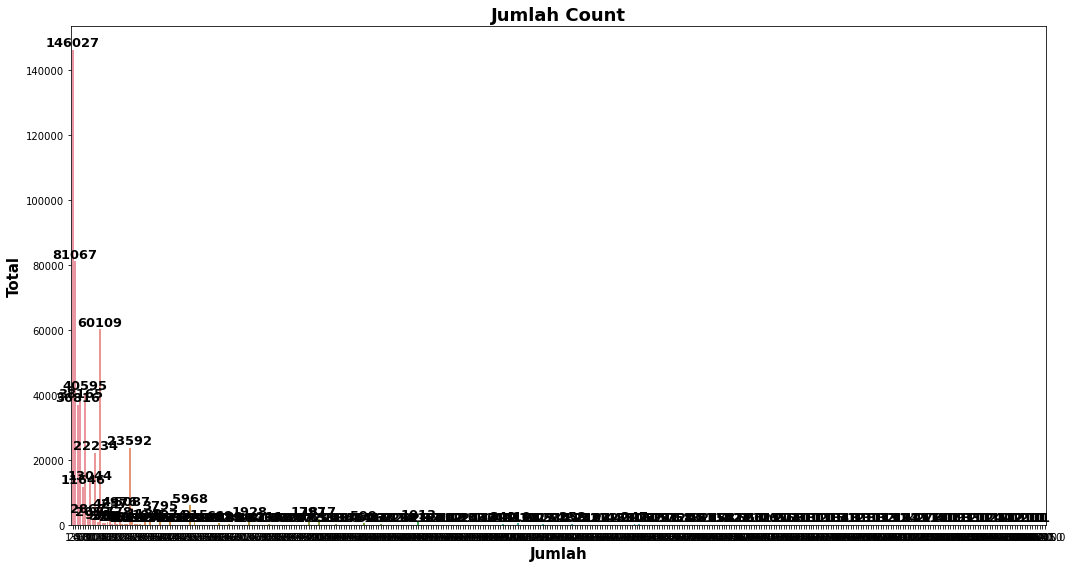

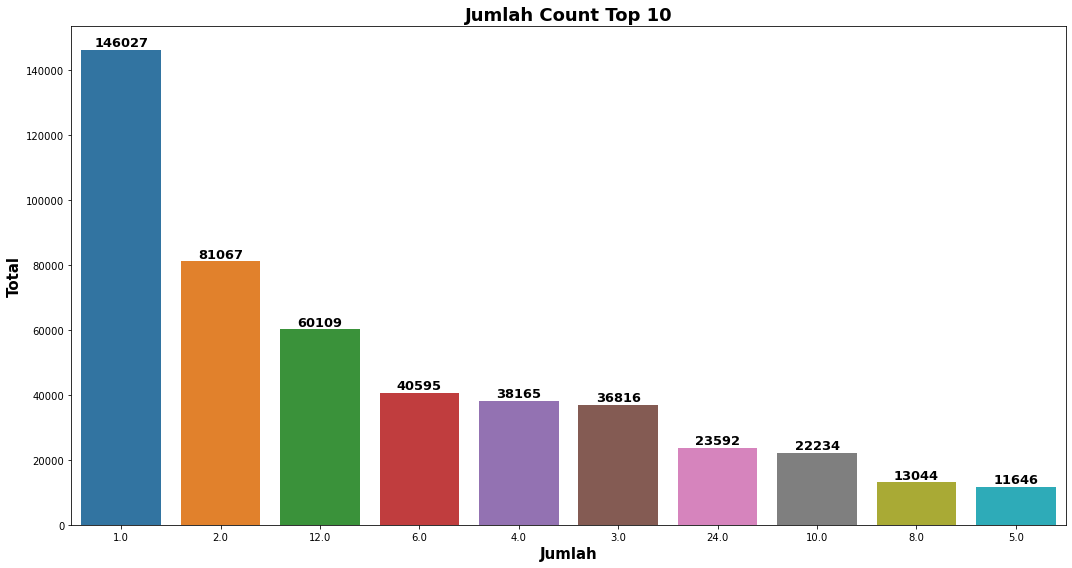

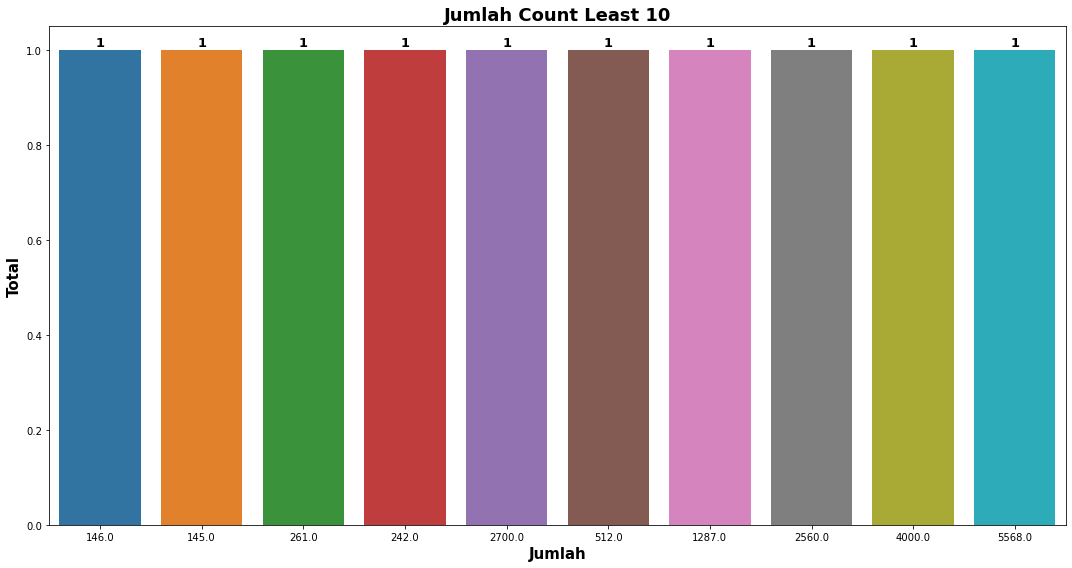

In [39]:
barplot_dfProfitCompany(dfProfitCompany_float[0])

### Harga_satuan Barplot

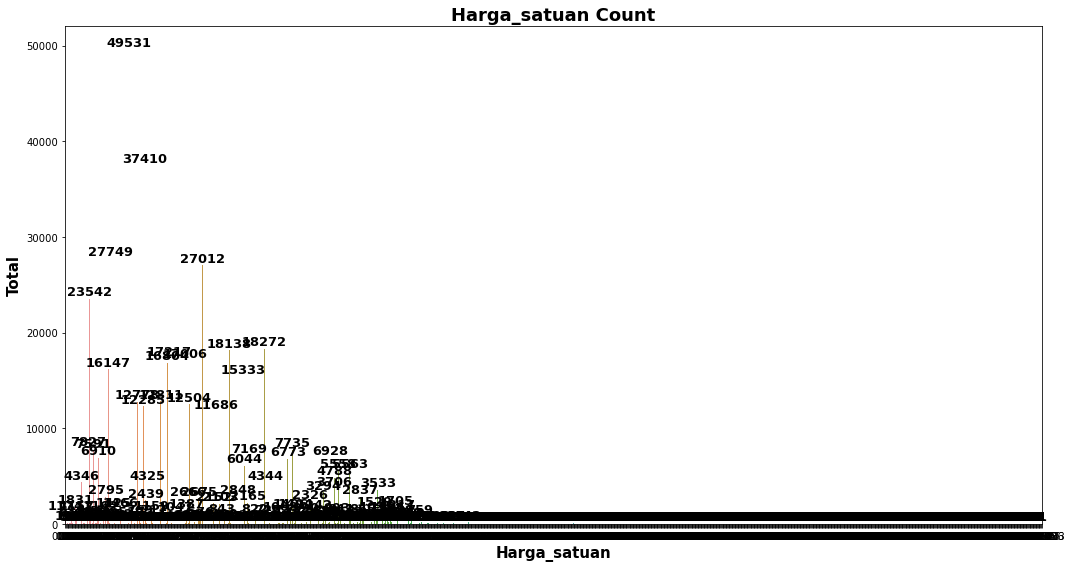

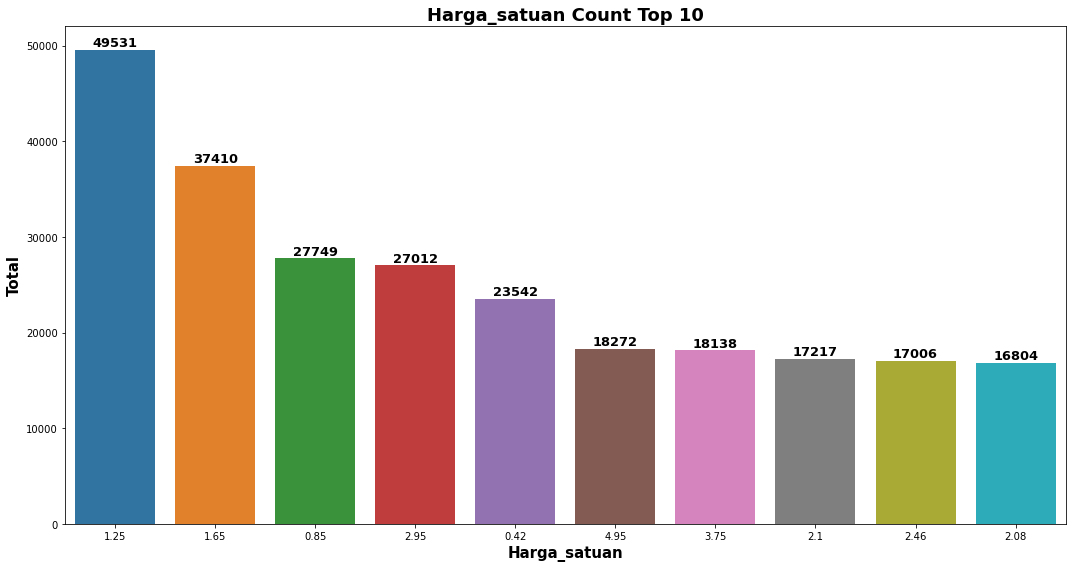

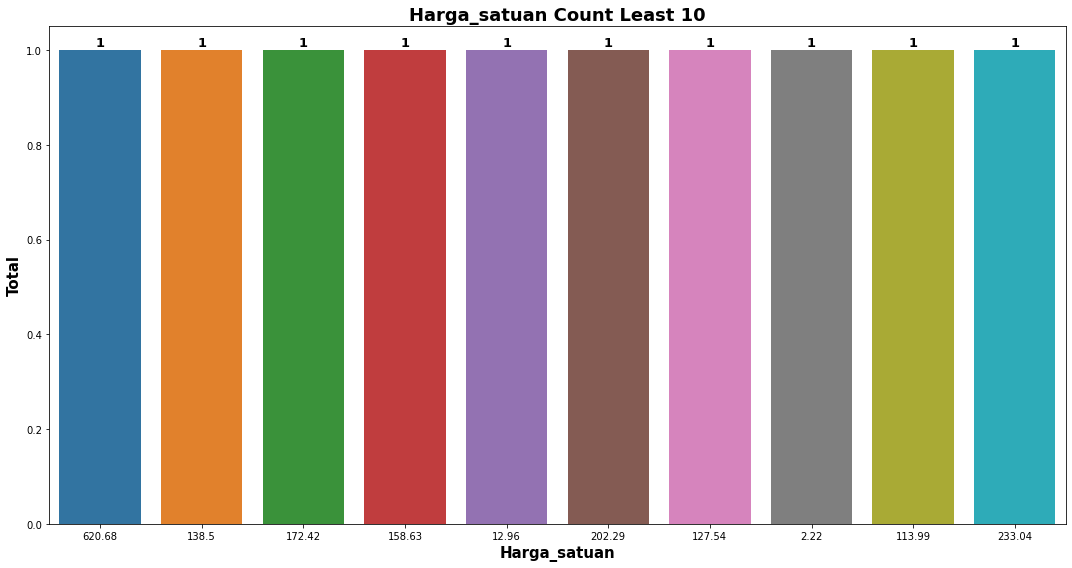

In [40]:
barplot_dfProfitCompany(dfProfitCompany_float[1])

### Total_pembelian Barplot

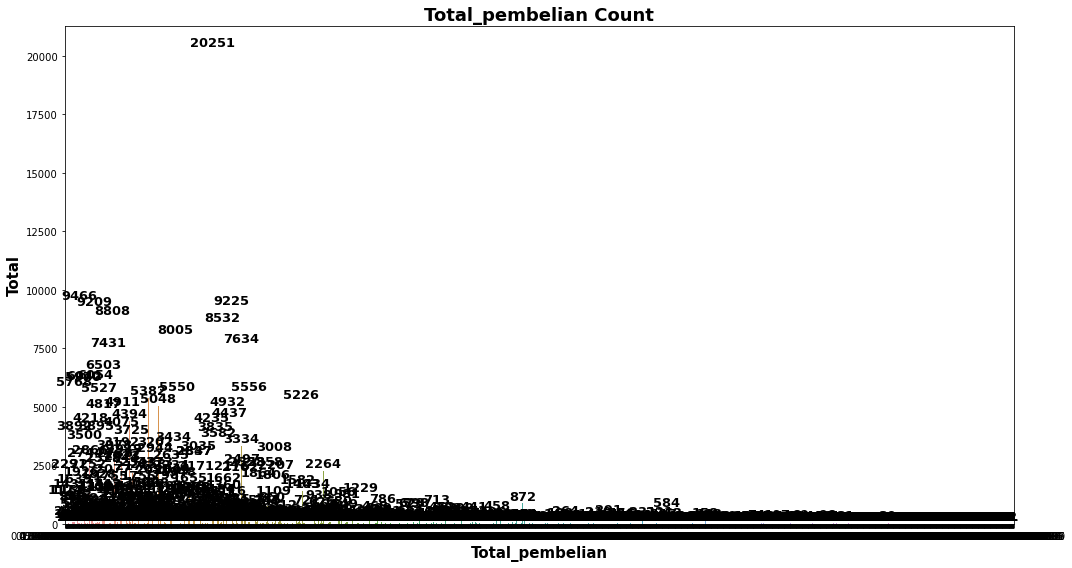

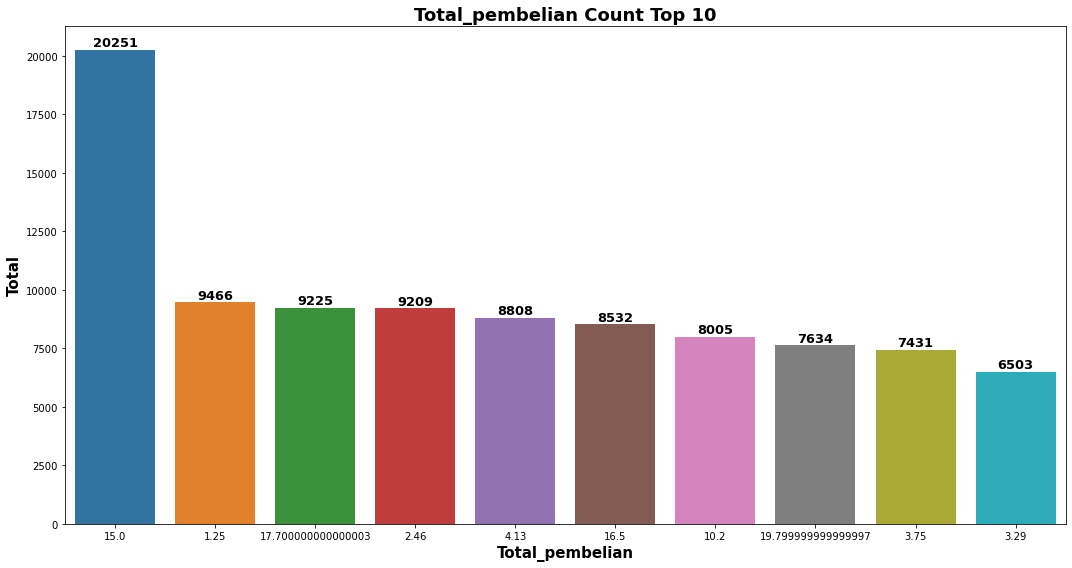

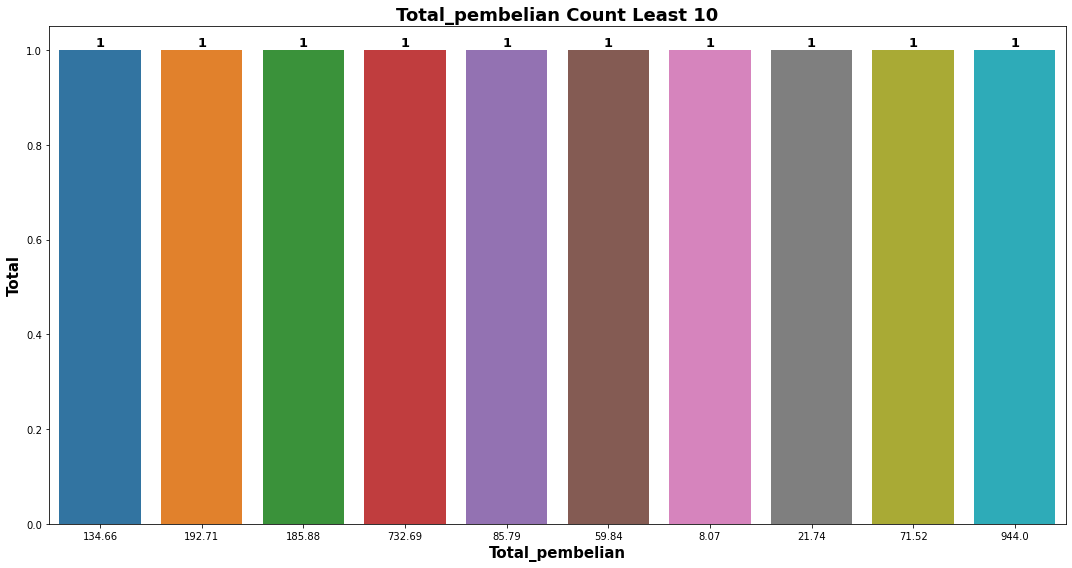

In [41]:
barplot_dfProfitCompany(dfProfitCompany_float[2])

### Kode_pelanggan Barplot

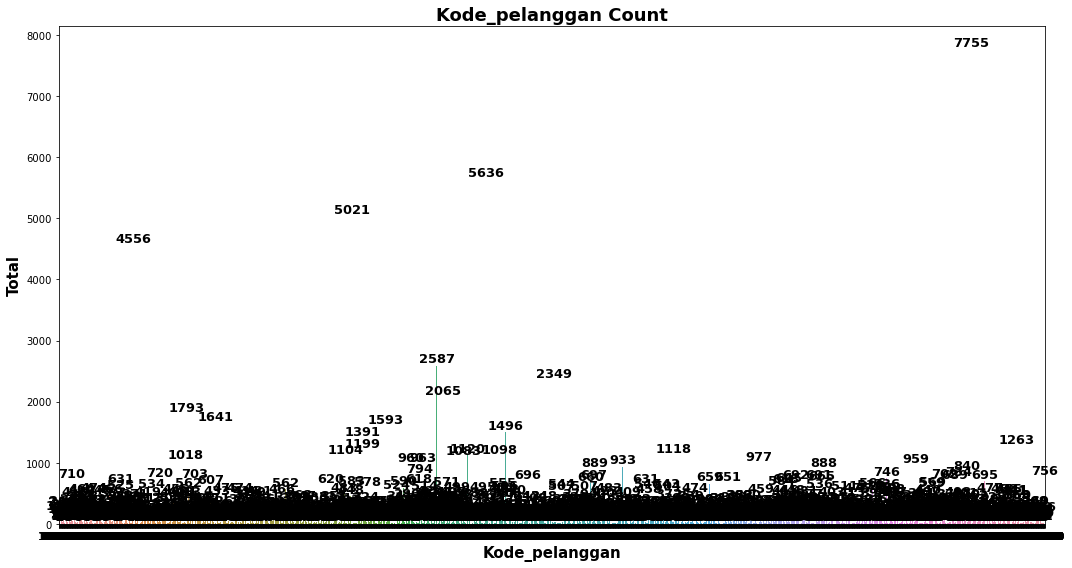

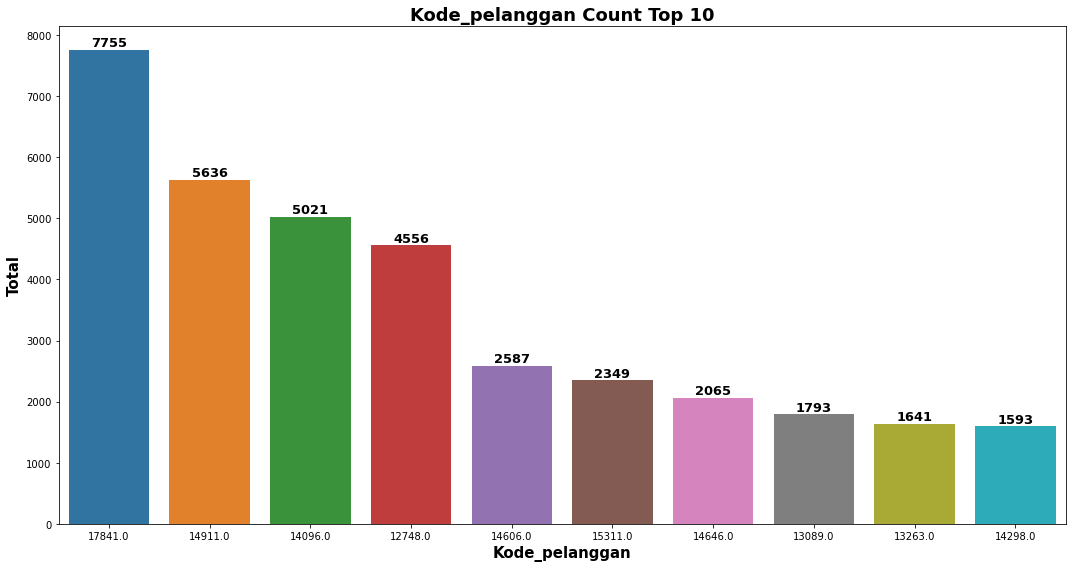

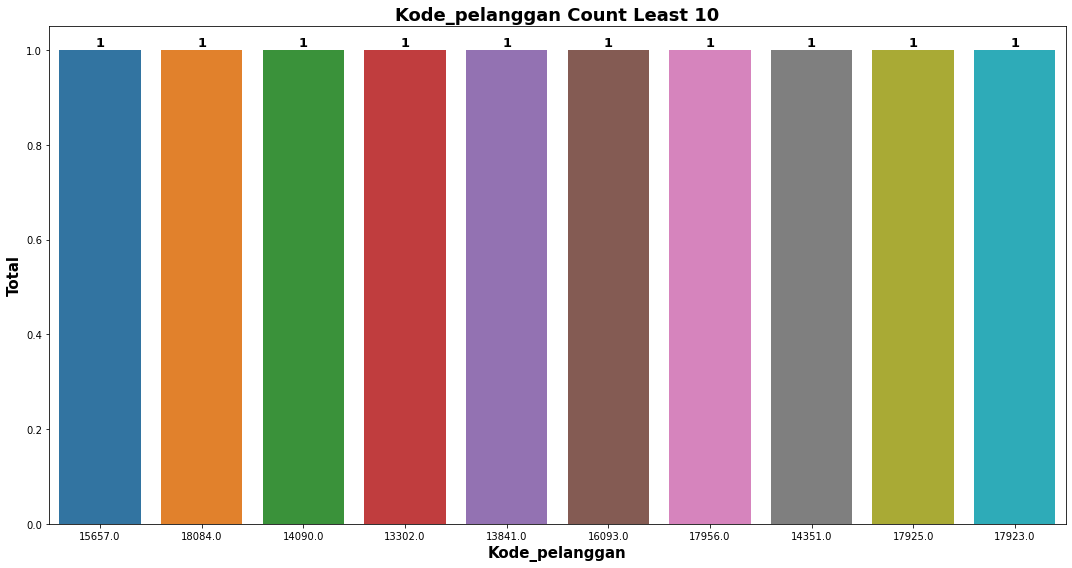

In [42]:
barplot_dfProfitCompany(dfProfitCompany_float[3])

### Kode_bayar Barplot

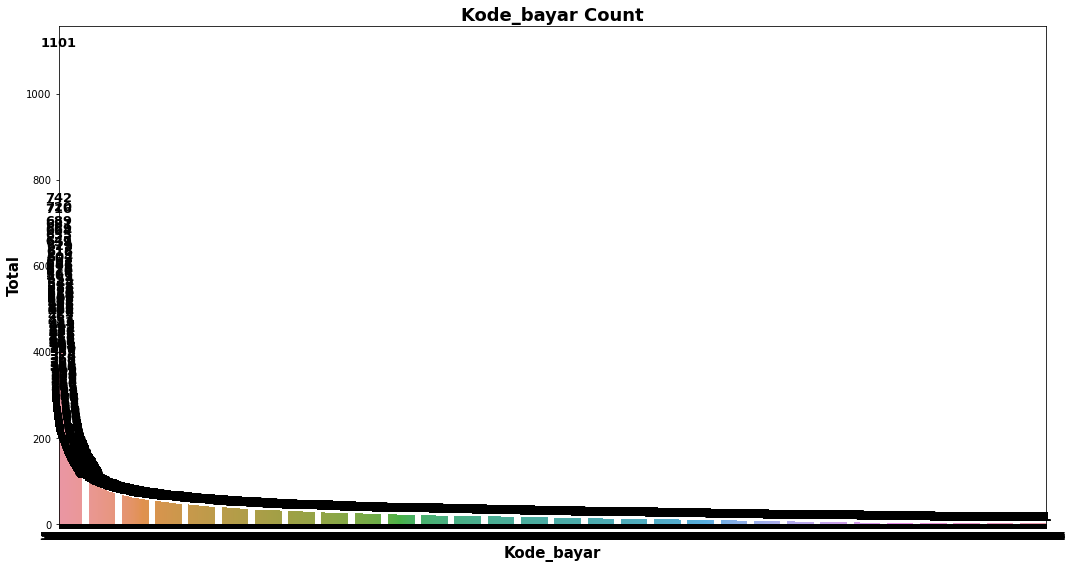

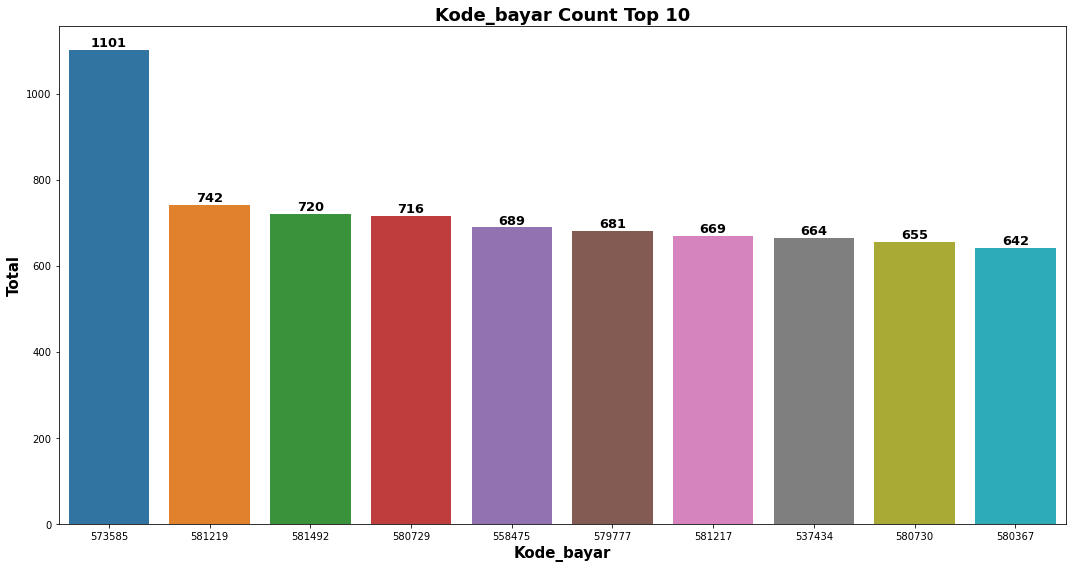

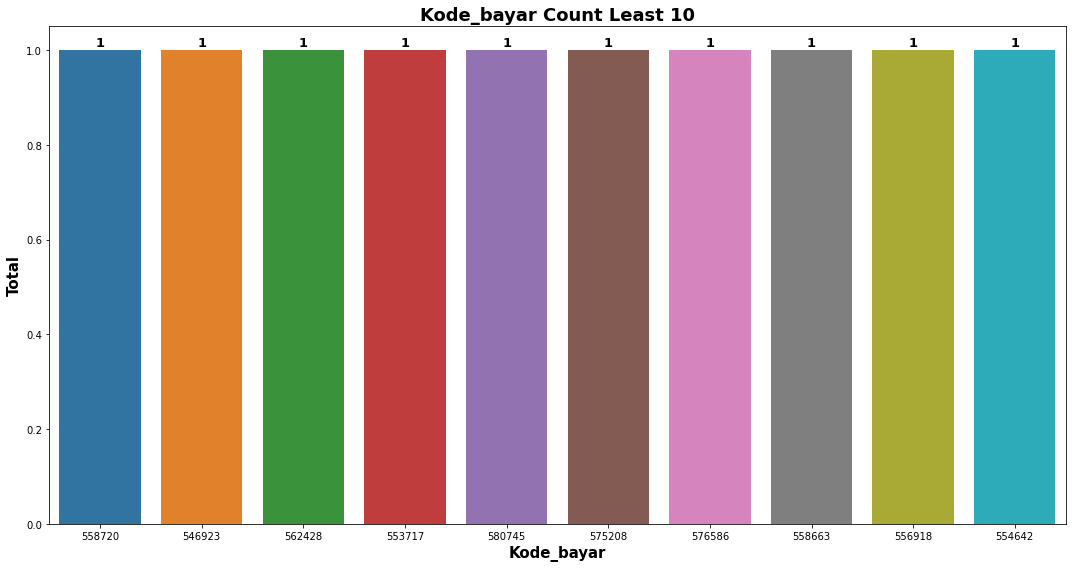

In [43]:
barplot_dfProfitCompany(dfProfitCompany_category[0])

### Tanggal_transaksi Barplot

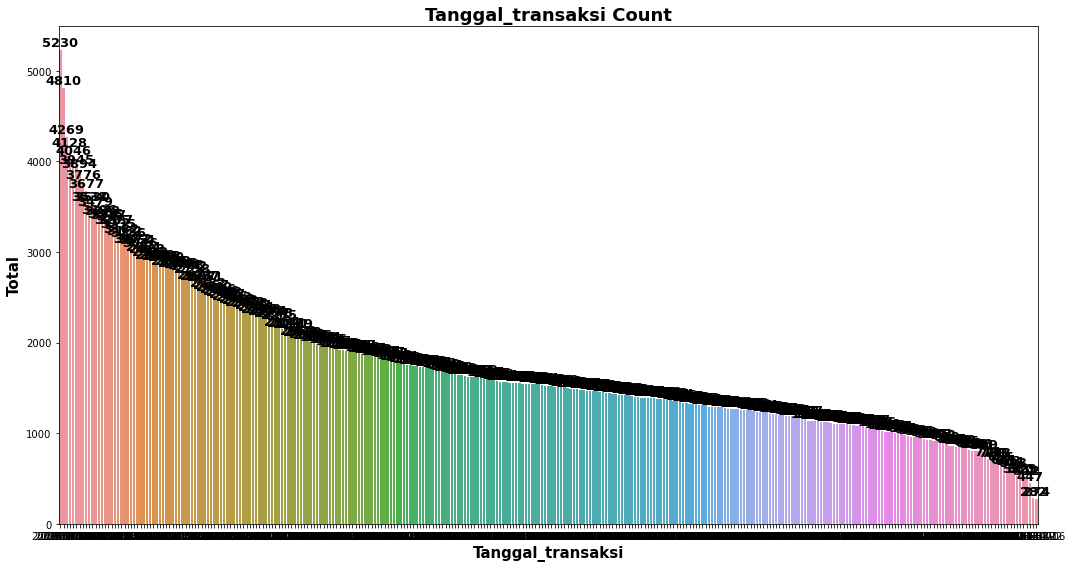

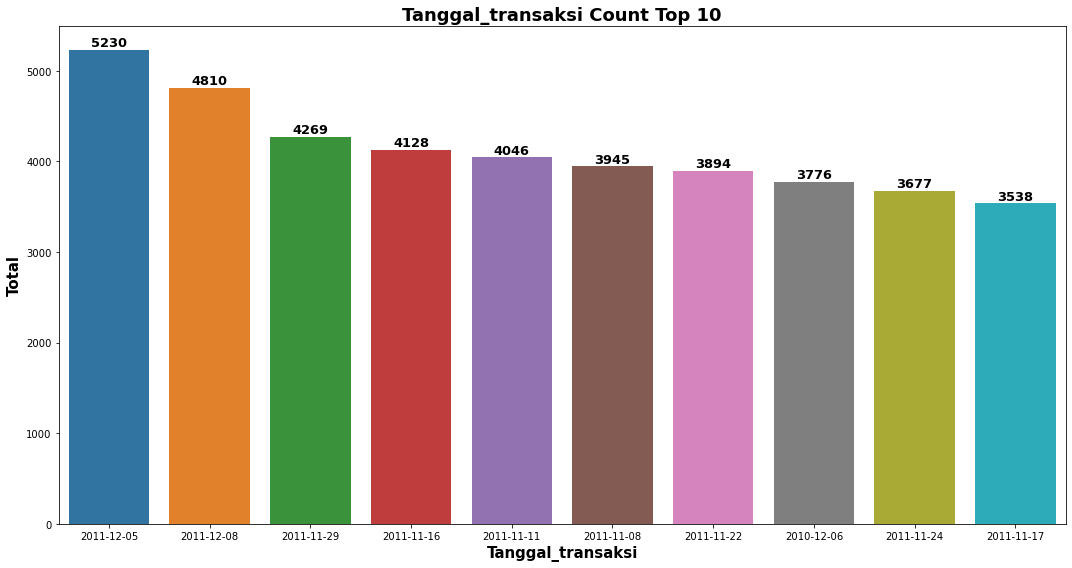

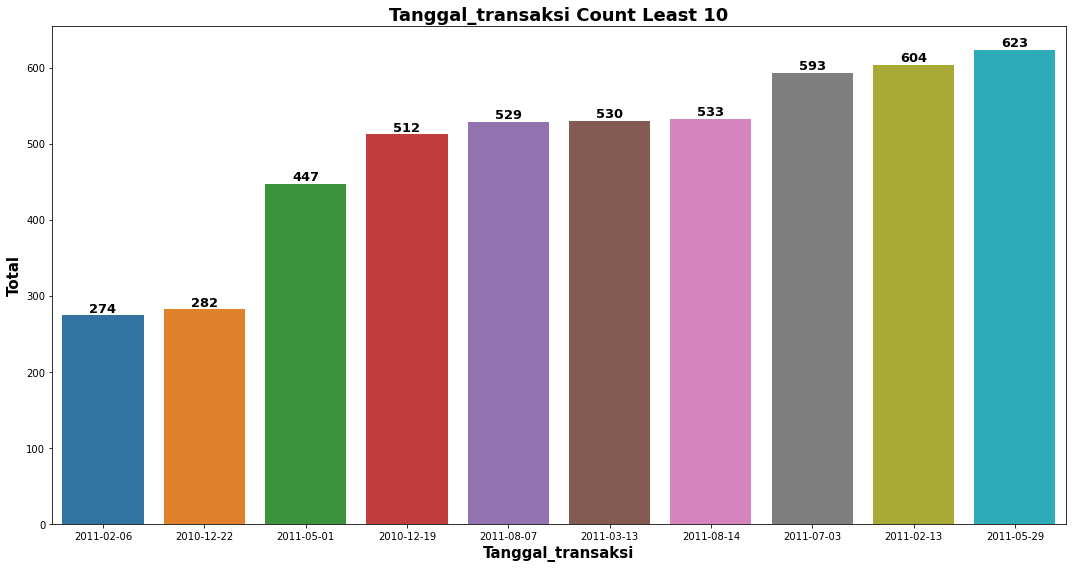

In [44]:
barplot_dfProfitCompany(dfProfitCompany_category[1])

### Jam_transaksi Barplot

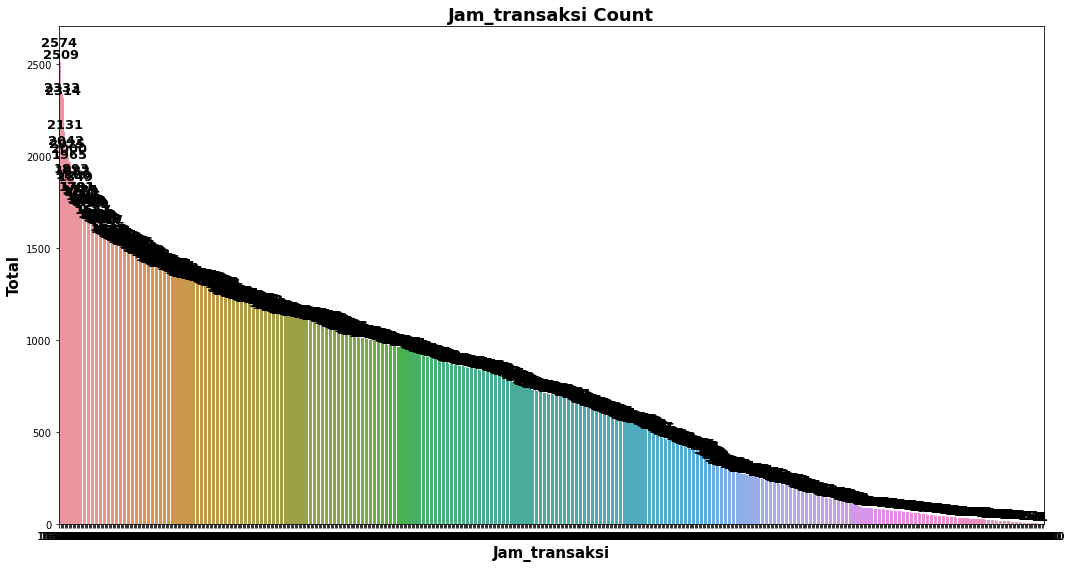

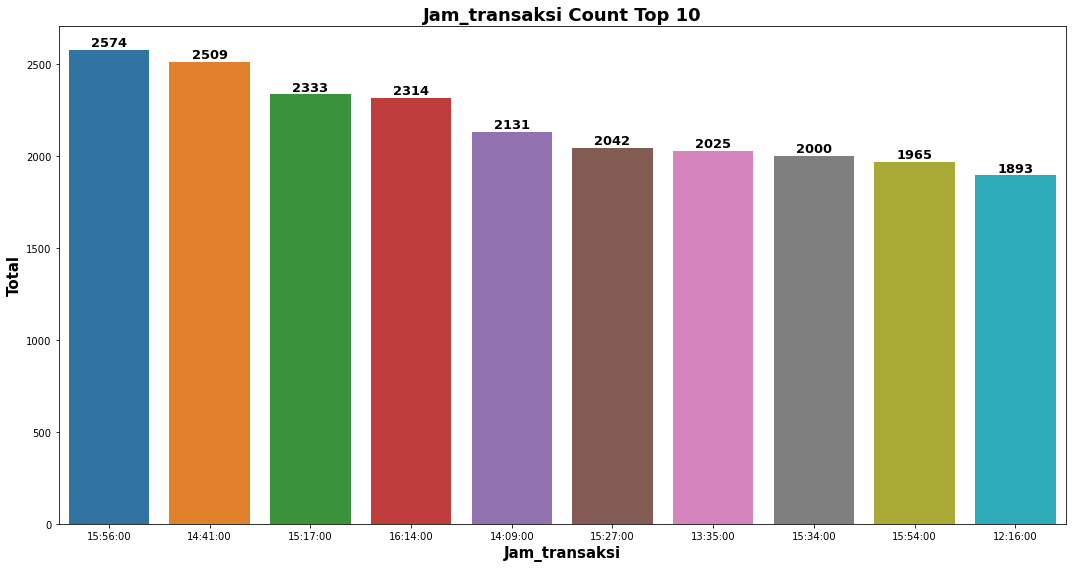

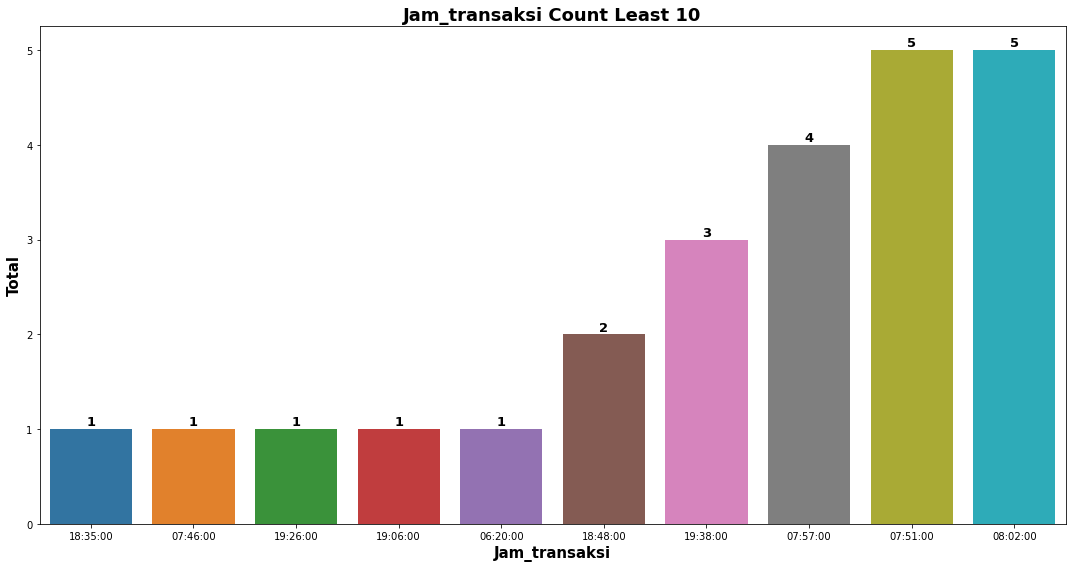

In [45]:
barplot_dfProfitCompany(dfProfitCompany_category[2])

### Kode_barang Barplot

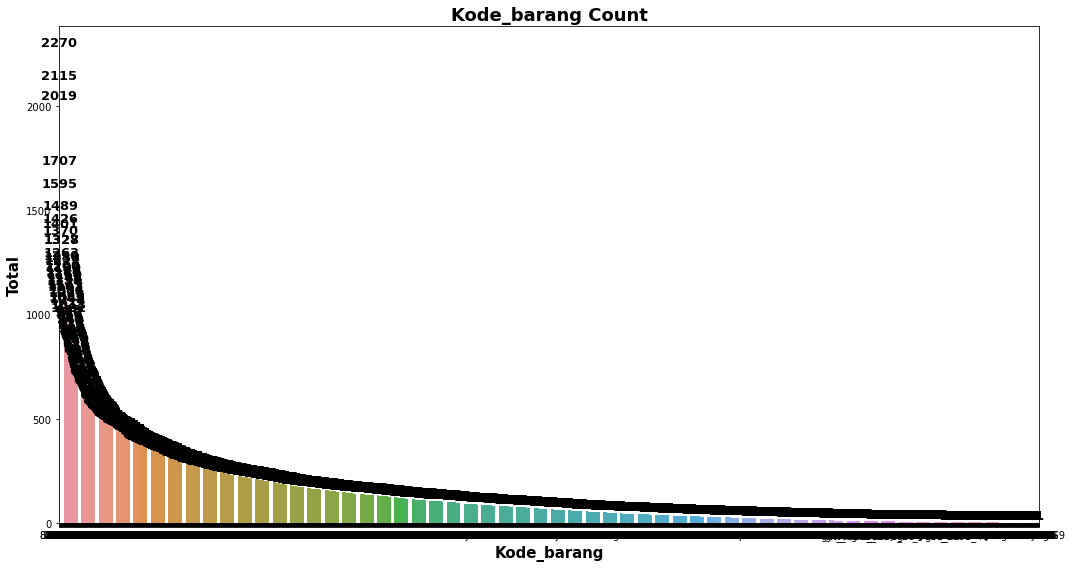

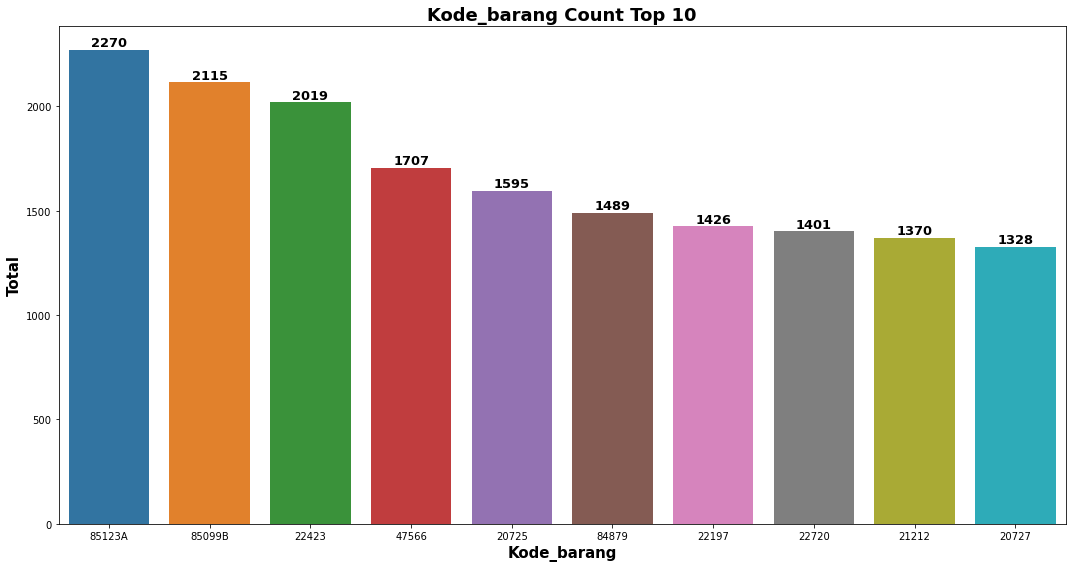

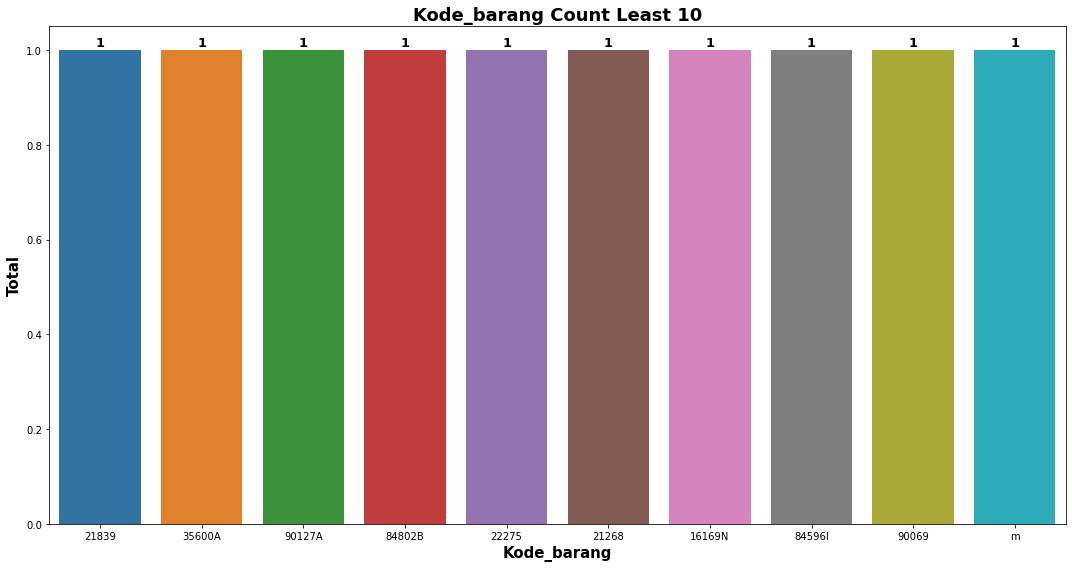

In [46]:
barplot_dfProfitCompany(dfProfitCompany_category[3])

### Barang Barplot

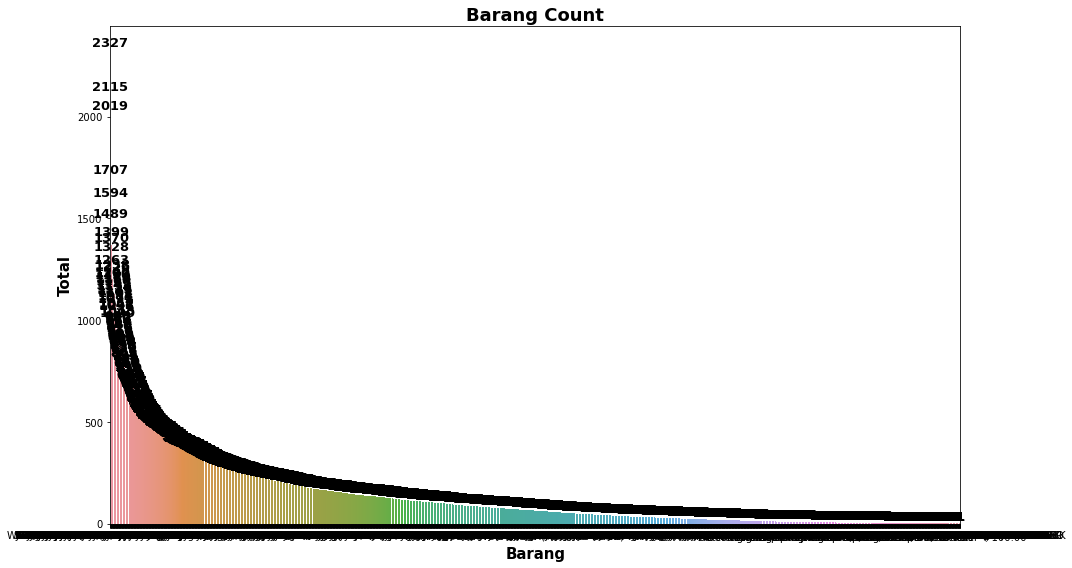

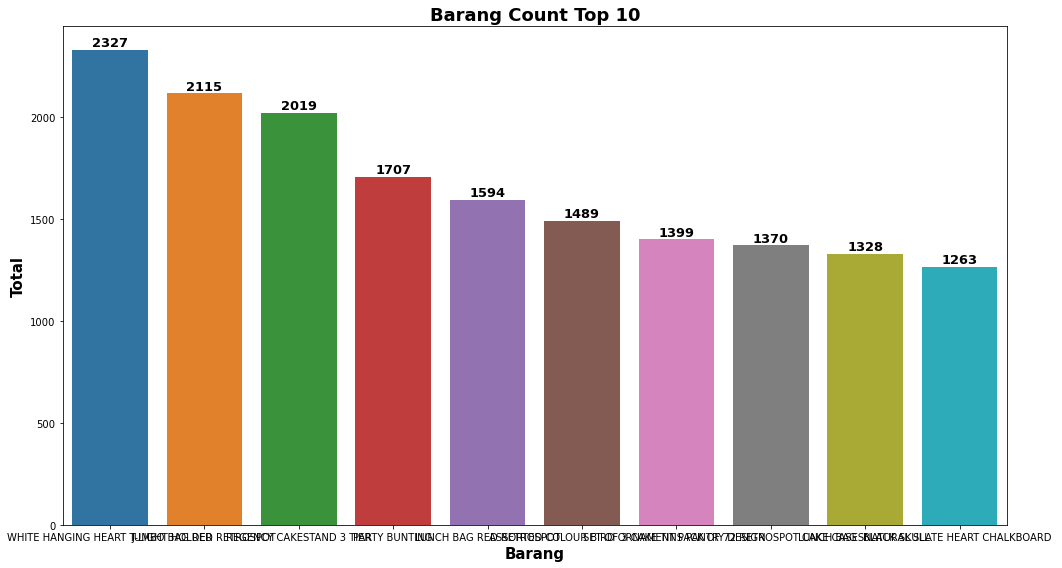

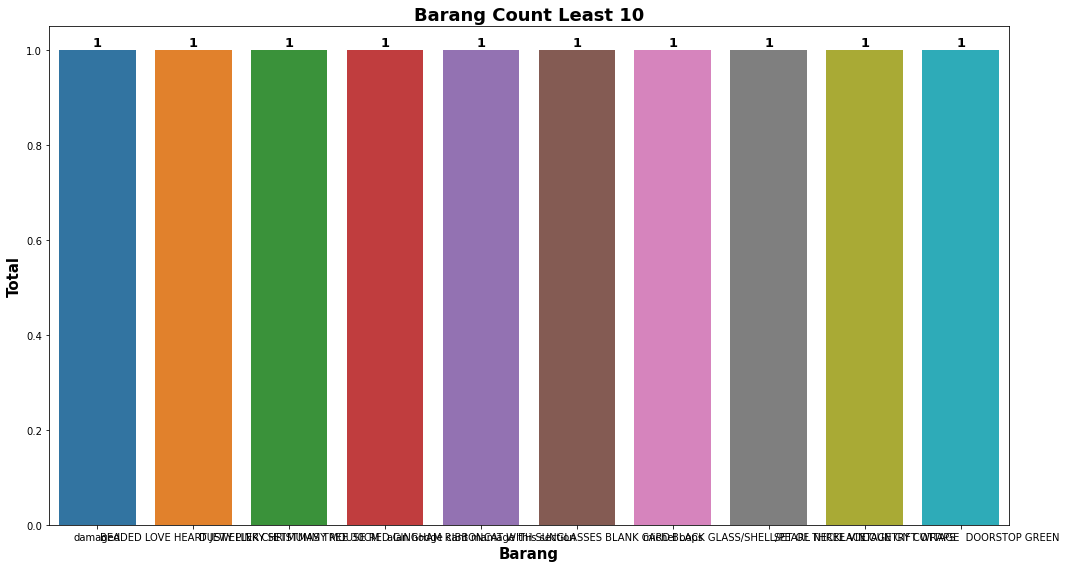

In [47]:
barplot_dfProfitCompany(dfProfitCompany_category[4])

### Negara Barplot

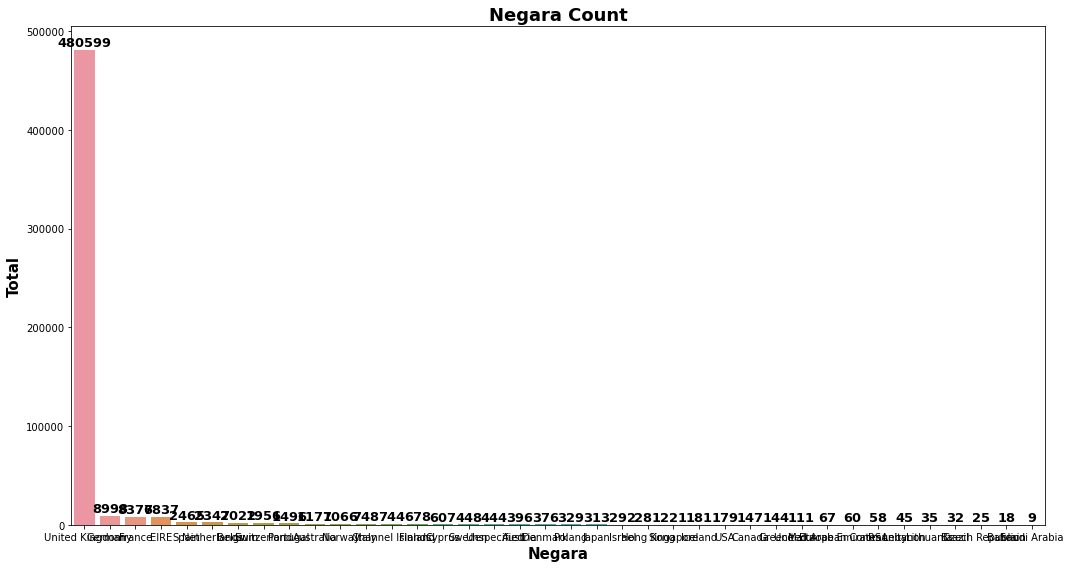

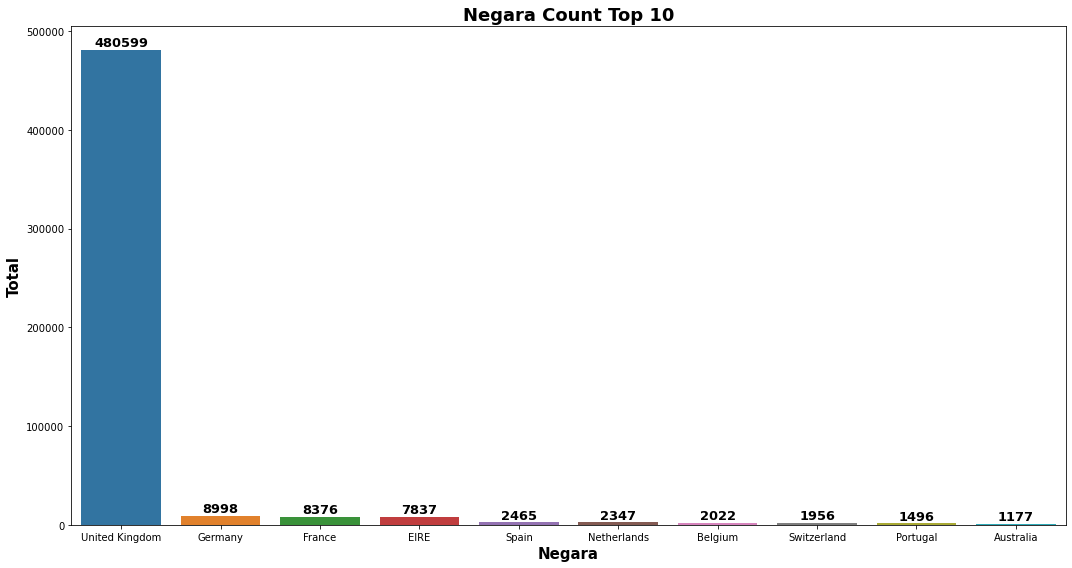

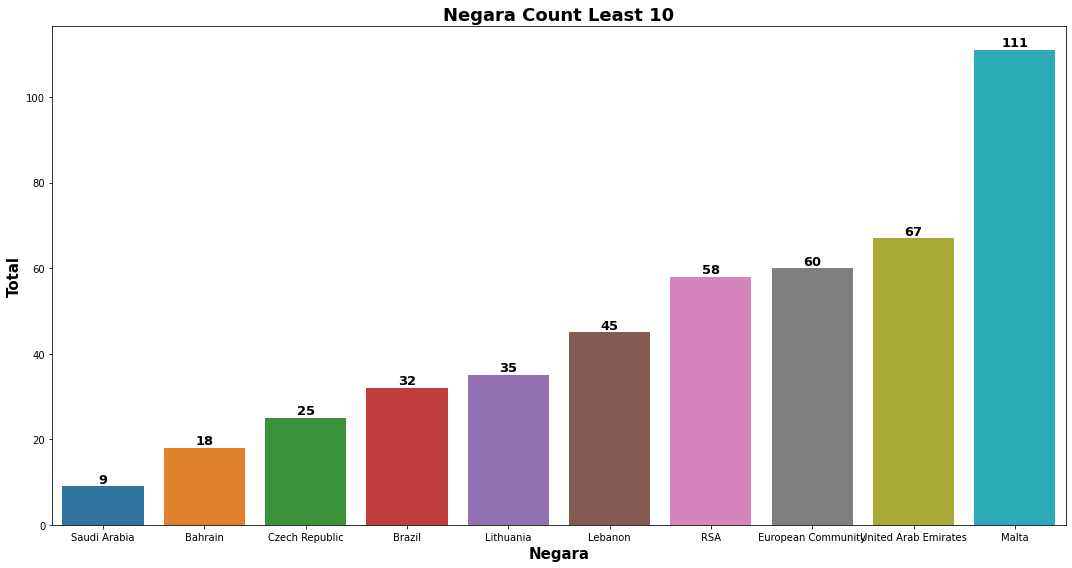

In [48]:
barplot_dfProfitCompany(dfProfitCompany_category[5])

# Exploratory Data Analysis on Loss Condition of Company

from result analysis in section 6, loss condition of company can be taken from condition where Jumlah is less than 0.

## Create New Dataframe called dfLossCompany

In [50]:
dfLossCompany = NegativeValueJumlah.copy()
dfLossCompany

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
141       C536379        2010-12-01      09:41:00           D   
154       C536383        2010-12-01      09:49:00      35004C   
235       C536391        2010-12-01      10:24:00       22556   
236       C536391        2010-12-01      10:24:00       21984   
237       C536391        2010-12-01      10:24:00       21983   
...           ...               ...           ...         ...   
540449    C581490        2011-12-09      09:57:00       23144   
541541    C581499        2011-12-09      10:28:00           M   
541715    C581568        2011-12-09      11:57:00       21258   
541716    C581569        2011-12-09      11:58:00       84978   
541717    C581569        2011-12-09      11:58:00       20979   

                                  Barang  Jumlah  Harga_Satuan  \
141                             Discount    -1.0         27.50   
154      SET OF 3 COLOURED  FLYING DUCKS    -1.0          4.65   
235       PLASTERS IN TIN CIRCUS PARADE    -12.0          1.65   
236     PACK OF 12 PINK PAISLEY TISSUES    -24.0          0.29   
237     PACK OF 12 BLUE PAISLEY TISSUES    -24.0          0.29   
...                                  ...     ...           ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL   -11.0          0.83   
541541                            Manual    -1.0        224.69   
541715        VICTORIAN SEWING BOX LARGE    -5.0         10.95   
541716  HANGING HEART JAR T-LIGHT HOLDER    -1.0          1.25   
541717     36 PENCILS TUBE RED RETROSPOT    -5.0          1.25   

        Total_Pembelian  Kode_Pelanggan          Negara  
141              -27.50         14527.0  United Kingdom  
154               -4.65         15311.0  United Kingdom  
235              -19.80         17548.0  United Kingdom  
236               -6.96         17548.0  United Kingdom  
237               -6.96         17548.0  United Kingdom  
...                 ...             ...             ...  
540449            -9.13         14397.0  United Kingdom  
541541          -224.69         15498.0  United Kingdom  
541715           -54.75         15311.0  United Kingdom  
541716            -1.25         17315.0  United Kingdom  
541717            -6.25         17315.0  United Kingdom  

[10545 rows x 10 columns]

## Statistical Numerical Analysis

In [52]:
dfLossCompany.describe()

Jumlah  Harga_Satuan  Total_Pembelian  Kode_Pelanggan
count  10545.000000  10545.000000     10545.000000     8839.000000
mean     -36.261261     42.602486       -68.996977    14991.582419
std      758.694072    625.803457       988.340747     1705.923276
min   -74215.000000      0.000000    -77183.600000    12346.000000
25%      -10.000000      1.060000       -16.150000    13506.000000
50%       -2.000000      2.100000        -6.840000    14895.000000
75%       -1.000000      4.950000        -2.100000    16393.000000
max       -1.000000  38970.000000        -0.000000    18282.000000

### Get list of Float and Object Column

In [53]:
dfLossCompany_float = dfLossCompany.select_dtypes(include=['float64']).columns.tolist()
dfLossCompany_float

['Jumlah', 'Harga_Satuan', 'Total_Pembelian', 'Kode_Pelanggan']

In [54]:
dfLossCompany_category = dfLossCompany.select_dtypes(include=['object']).columns.tolist()
dfLossCompany_category

['Kode_Bayar',
 'Tanggal_Transaksi',
 'Jam_Transaksi',
 'Kode_Barang',
 'Barang',
 'Negara']

## Statistical Categorical Analysis

In [55]:
dfLossCompany_category_describe = dfLossCompany[dfLossCompany_category]
dfLossCompany_category_describe

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
141       C536379        2010-12-01      09:41:00           D   
154       C536383        2010-12-01      09:49:00      35004C   
235       C536391        2010-12-01      10:24:00       22556   
236       C536391        2010-12-01      10:24:00       21984   
237       C536391        2010-12-01      10:24:00       21983   
...           ...               ...           ...         ...   
540449    C581490        2011-12-09      09:57:00       23144   
541541    C581499        2011-12-09      10:28:00           M   
541715    C581568        2011-12-09      11:57:00       21258   
541716    C581569        2011-12-09      11:58:00       84978   
541717    C581569        2011-12-09      11:58:00       20979   

                                  Barang          Negara  
141                             Discount  United Kingdom  
154      SET OF 3 COLOURED  FLYING DUCKS  United Kingdom  
235       PLASTERS IN TIN CIRCUS PARADE   United Kingdom  
236     PACK OF 12 PINK PAISLEY TISSUES   United Kingdom  
237     PACK OF 12 BLUE PAISLEY TISSUES   United Kingdom  
...                                  ...             ...  
540449   ZINC T-LIGHT HOLDER STARS SMALL  United Kingdom  
541541                            Manual  United Kingdom  
541715        VICTORIAN SEWING BOX LARGE  United Kingdom  
541716  HANGING HEART JAR T-LIGHT HOLDER  United Kingdom  
541717     36 PENCILS TUBE RED RETROSPOT  United Kingdom  

[10545 rows x 6 columns]

In [56]:
dfLossCompany_category_describe.describe()

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  Barang  \
count       10545             10545         10545       10545    9683   
unique       5142               303           696        2535    2085   
top       C570867        2011-10-06      16:17:00           M  Manual   
freq          101               244           115         244     244   

                Negara  
count            10545  
unique              30  
top     United Kingdom  
freq              9120

## Create Boxplot Function to Check Outliers

In [57]:
def boxplot_dfLossCompany(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(dfLossCompany[numerical]).set_title(numerical)
    median = dfLossCompany[numerical].median()
    FirstQuartile = dfLossCompany[numerical].quantile(0.25)
    ThirdQuartile = dfLossCompany[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(dfLossCompany[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(dfLossCompany[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Float Univariate Analysis

### Jumlah Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  -2.0
1st Quartile :  -10.0
3rd Quartile :  -1.0
IQR :  9.0
Upper Fence :  12.5
Lower Fence :  -23.5

Outliers Data Detection
Upper Outliers Data :  [13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


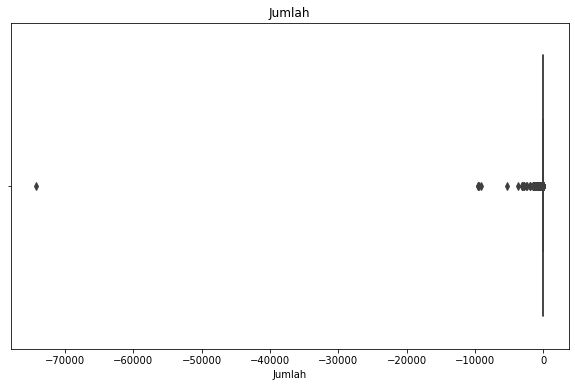

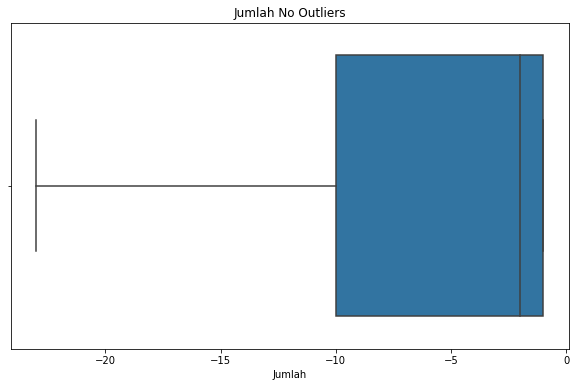

In [58]:
boxplot_dfLossCompany(dfLossCompany_float[0])

### Harga Satuan Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  2.1
1st Quartile :  1.06
3rd Quartile :  4.95
IQR :  3.89
Upper Fence :  10.785
Lower Fence :  -4.775

Outliers Data Detection
Upper Outliers Data :  [10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10.79, 10

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


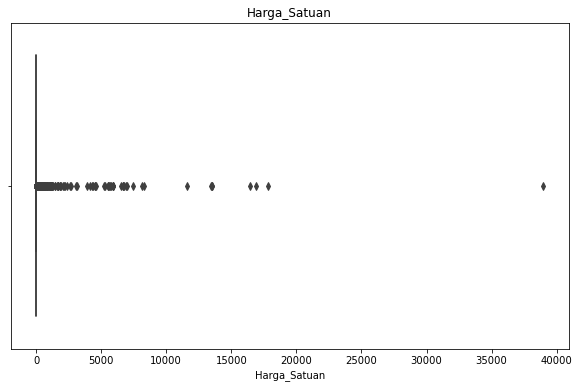

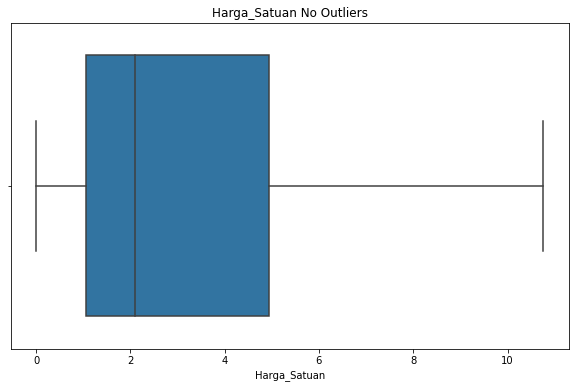

In [59]:
boxplot_dfLossCompany(dfLossCompany_float[1])

### Total Pembelian Boxplot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  -6.84
1st Quartile :  -16.15
3rd Quartile :  -2.1
IQR :  14.049999999999999
Upper Fence :  18.974999999999998
Lower Fence :  -37.224999999999994

Outliers Data Detection
Upper Outliers Data :  [19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.049999999999997, 19.049999999999997, 19.049999999999997, 19.049999999999997, 19.049999999999997, 19.049999999999997, 19.049999999999997, 19.080000000000002, 19.080000000000002, 19.080000000000002, 19.080000000000002, 19.080000000000002, 19.080000000000002, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.09, 19.13, 19.13, 19.13, 19.13, 19.13, 19.13, 19.14, 19.14, 19.169999999999998, 19.169999999999998, 19.2, 19.2, 19.2, 19.2, 19.2, 19.2, 19.2, 19.2, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.35, 19.44, 19.44, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5,

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


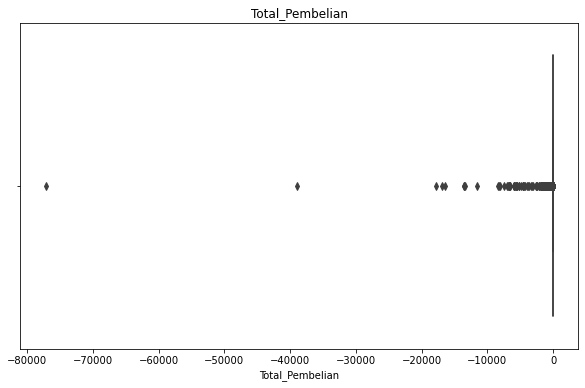

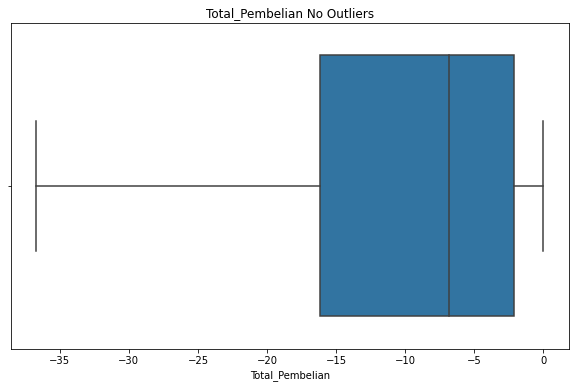

In [60]:
boxplot_dfLossCompany(dfLossCompany_float[2])

### Kode Pelanggan Boxploat

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Statistical Data Summary
Median :  14895.0
1st Quartile :  13506.0
3rd Quartile :  16393.0
IQR :  nan
Upper Fence :  nan
Lower Fence :  nan

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


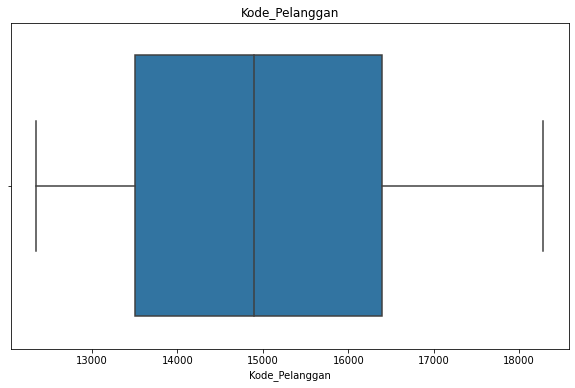

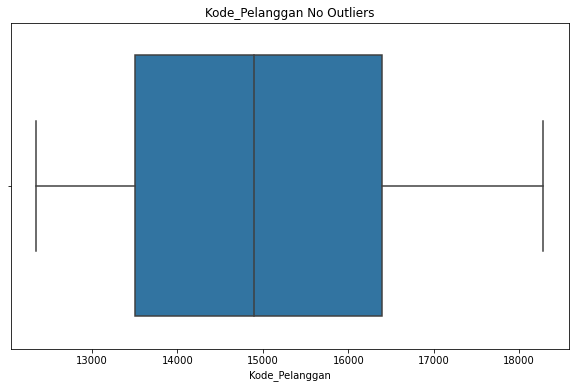

In [61]:
boxplot_dfLossCompany(dfLossCompany_float[3])

## Barplot Function

In [62]:
def barplot_dfLossCompany(data):
    barplot_data = dfLossCompany[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title( data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )
    
    plt.figure(figsize=(15,8))
    smallest5 = barplot_data.nsmallest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = smallest5,
        order = smallest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Least 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

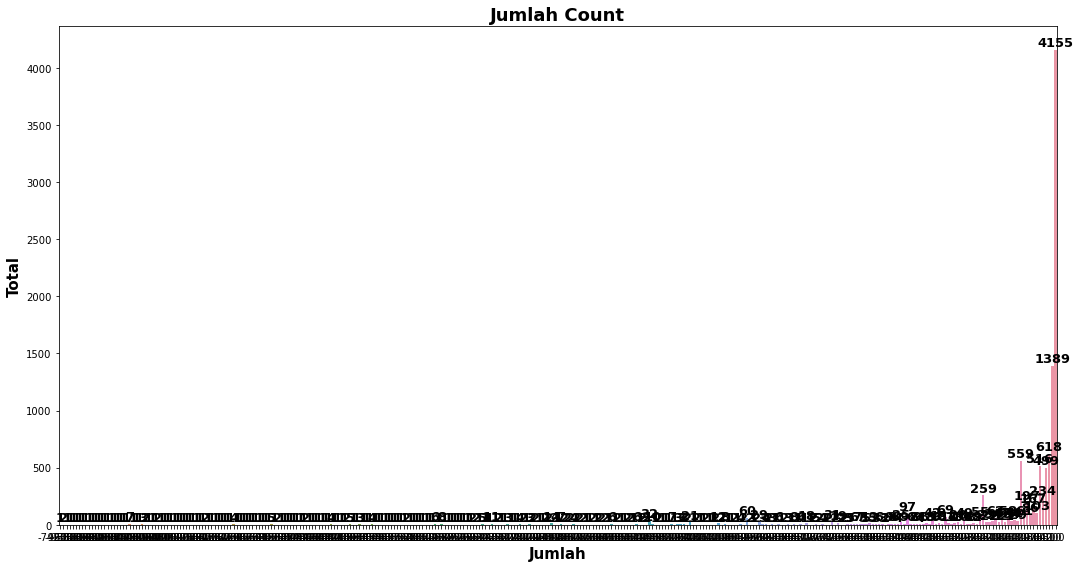

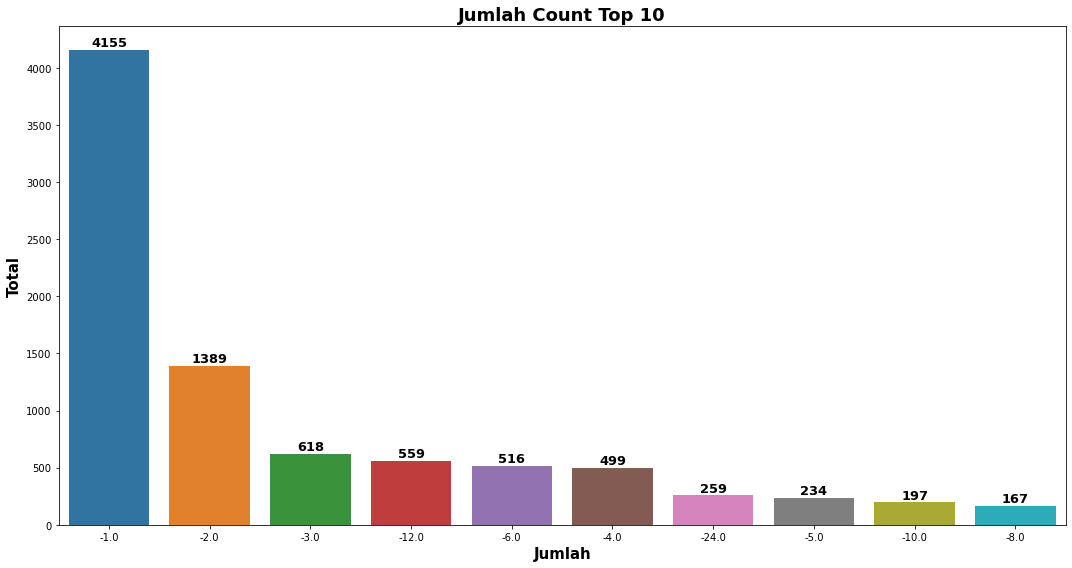

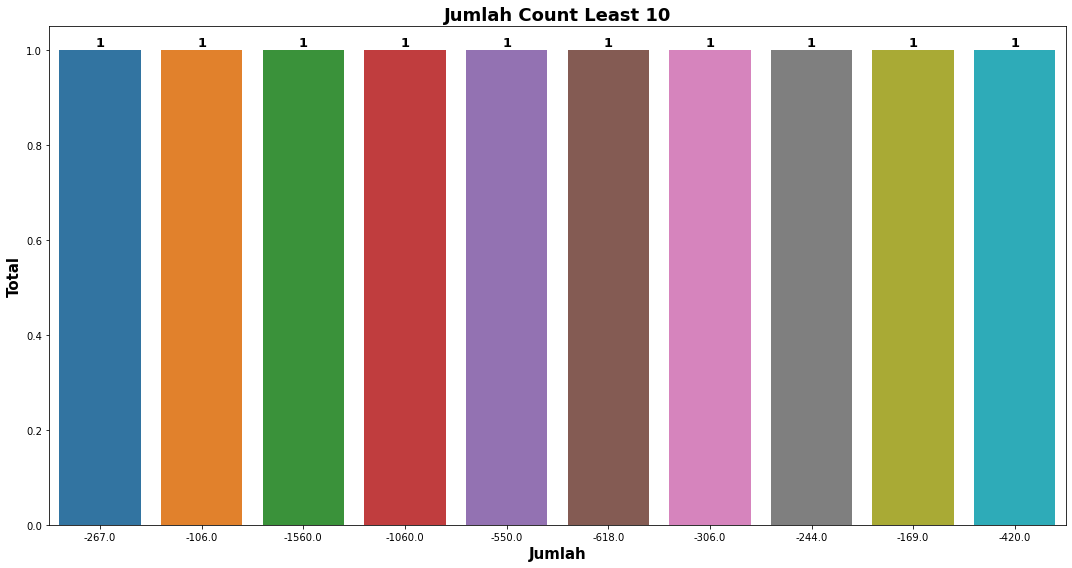

In [63]:
barplot_dfLossCompany(dfLossCompany_float[0])

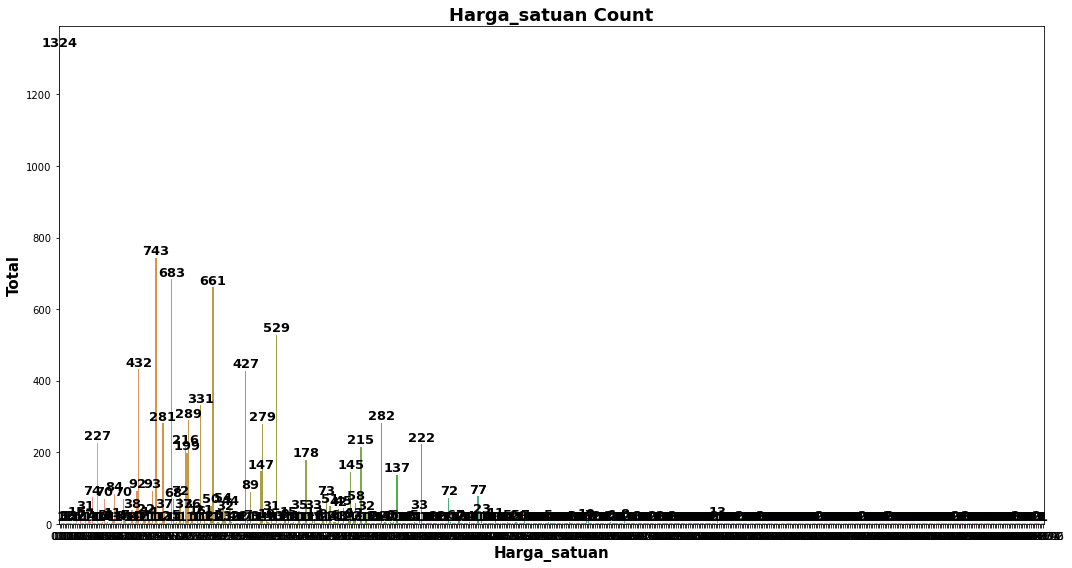

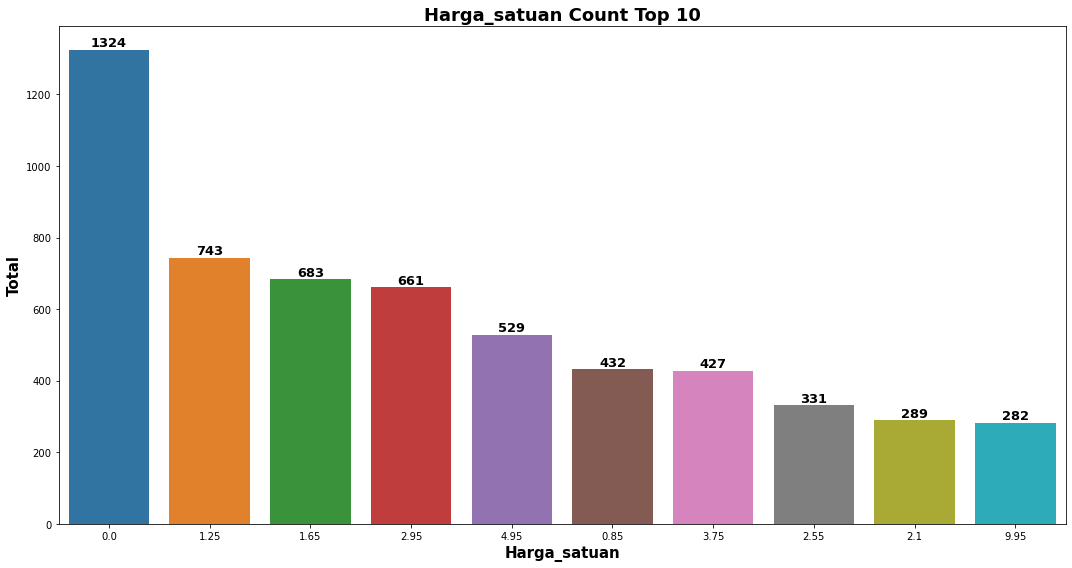

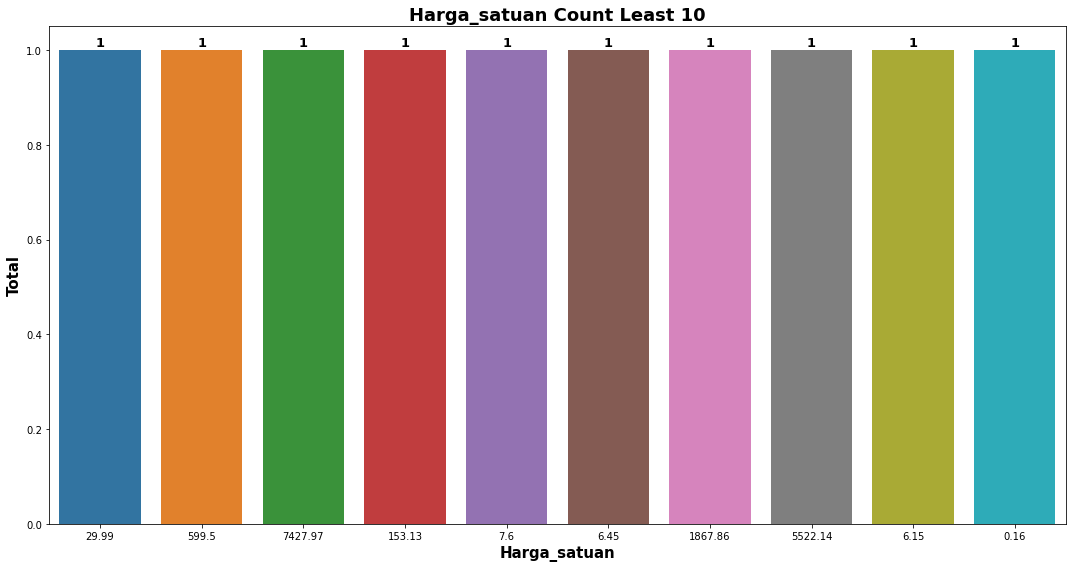

In [64]:
barplot_dfLossCompany(dfLossCompany_float[1])

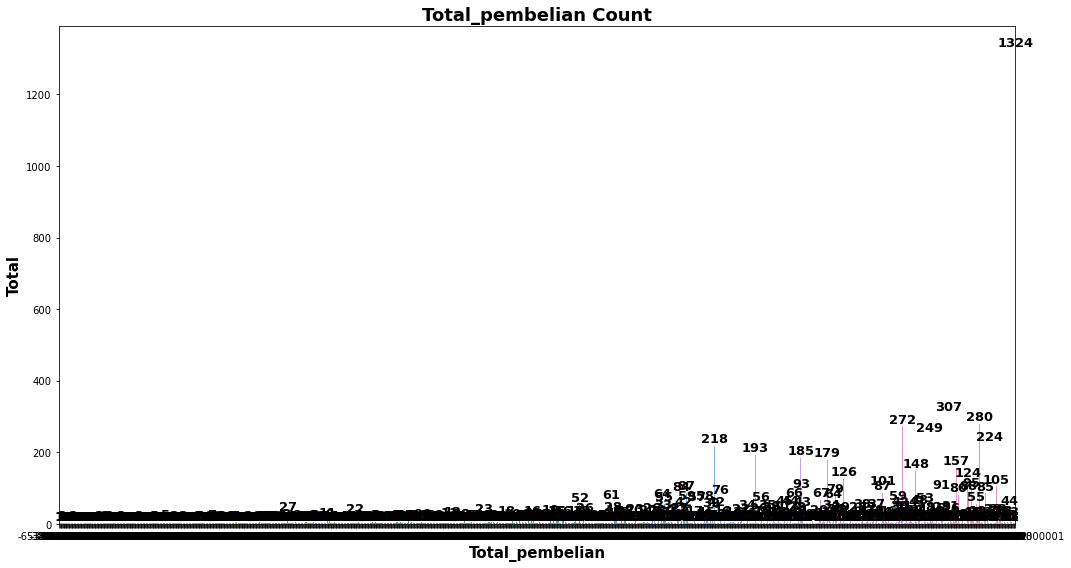

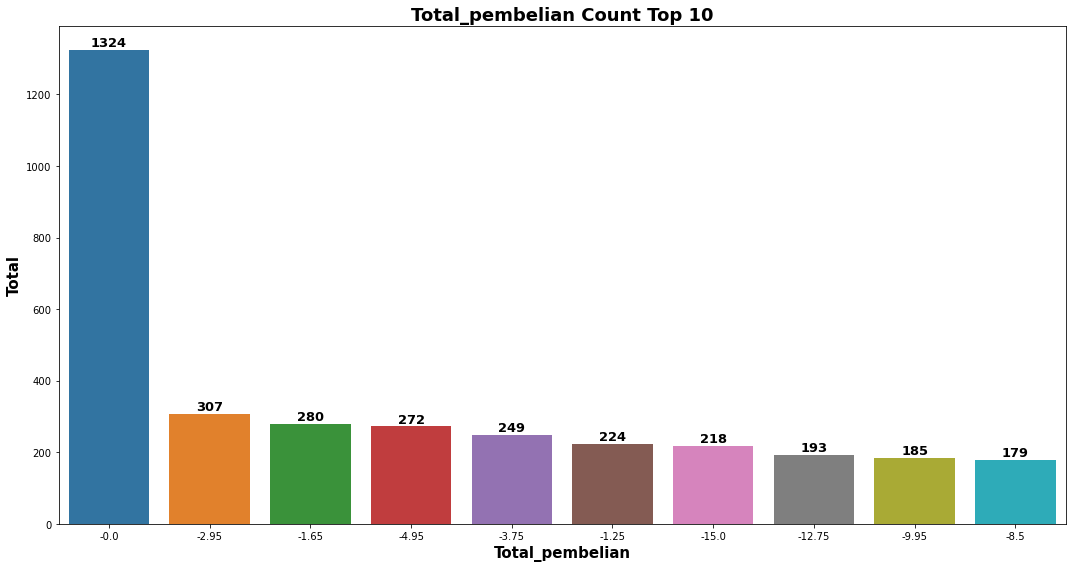

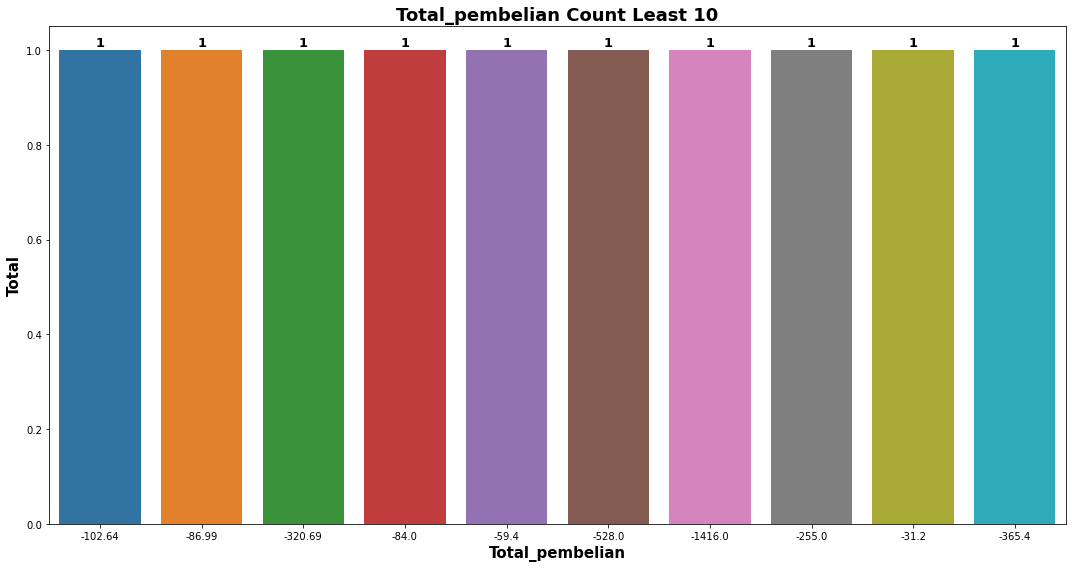

In [65]:
barplot_dfLossCompany(dfLossCompany_float[2])

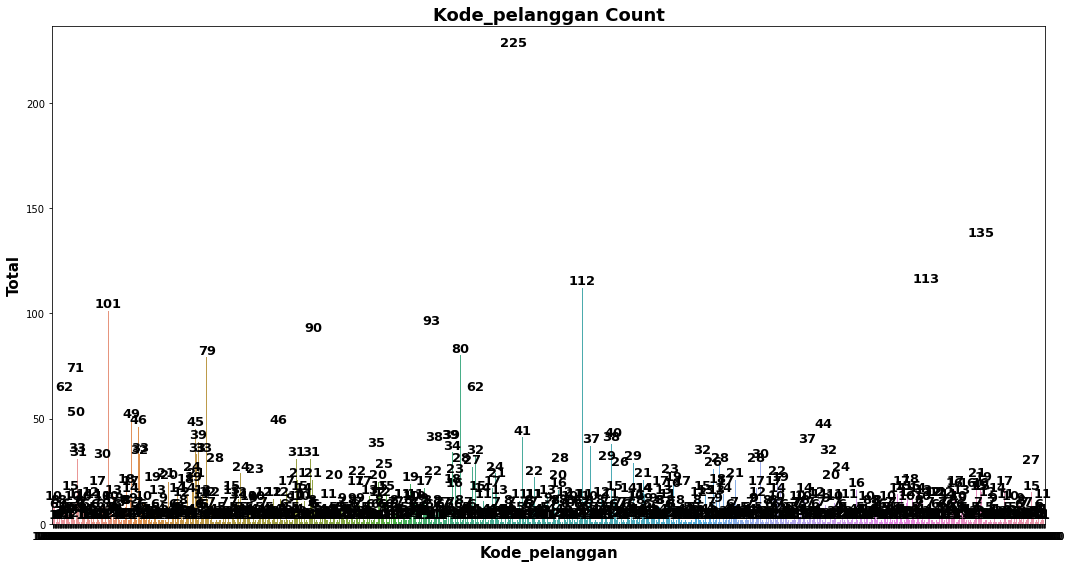

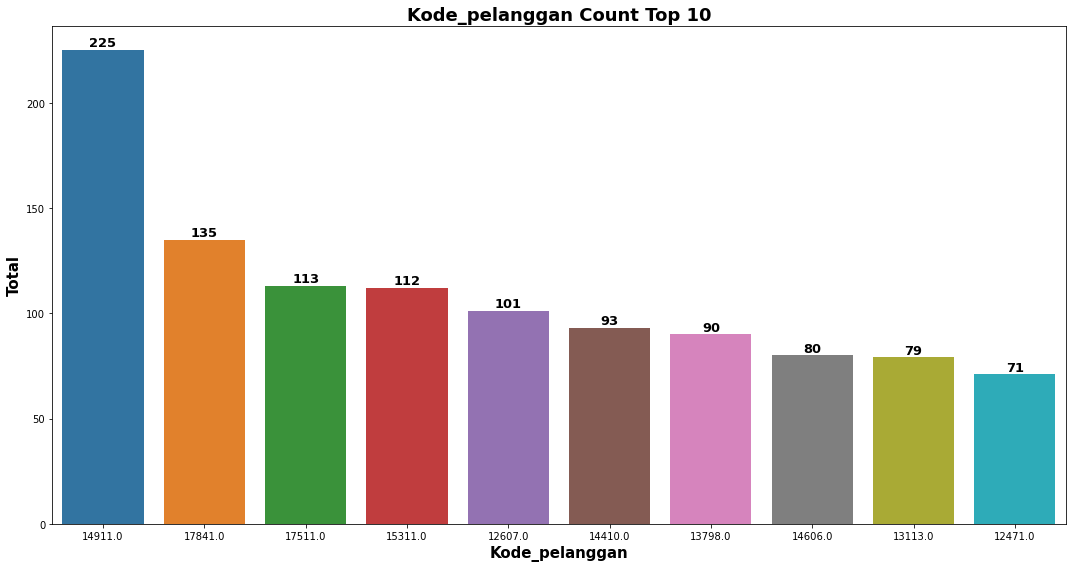

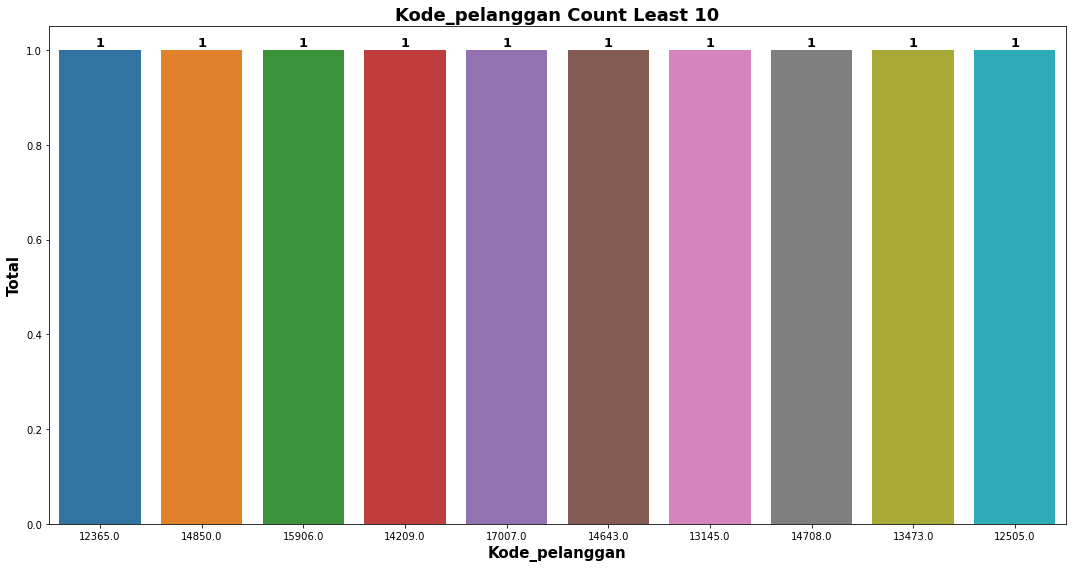

In [66]:
barplot_dfLossCompany(dfLossCompany_float[3])

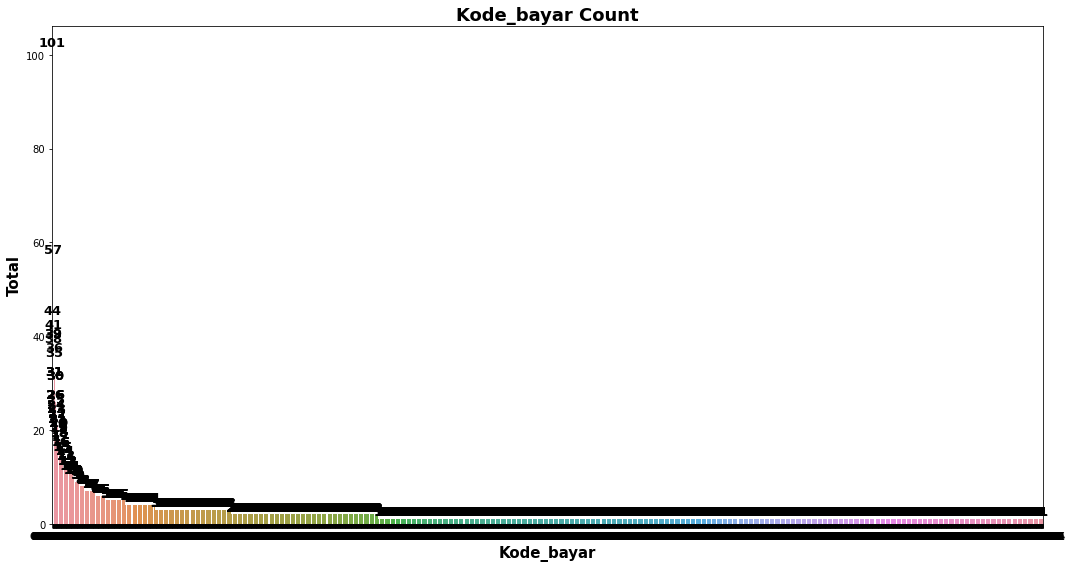

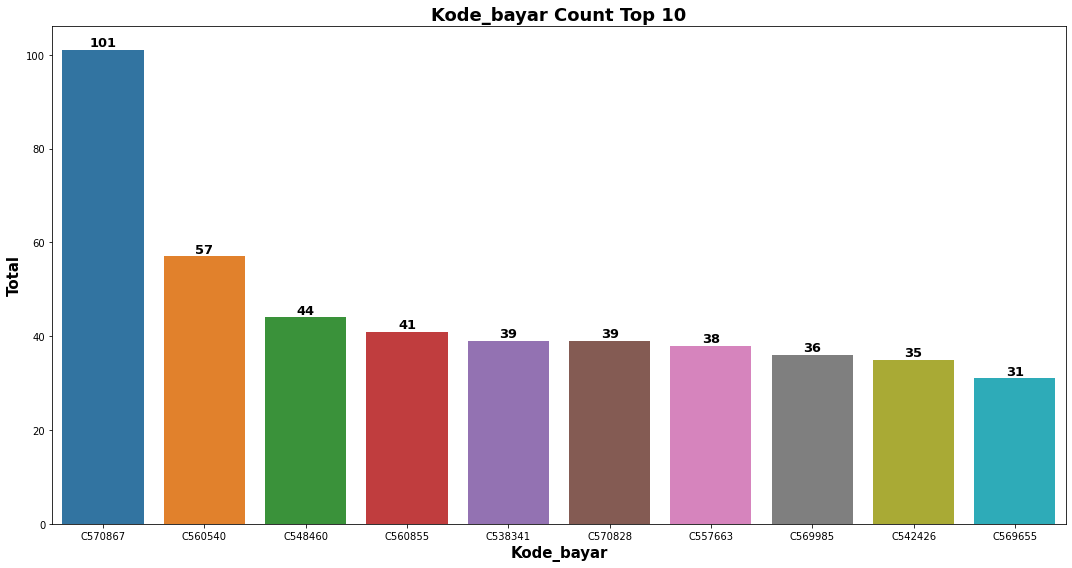

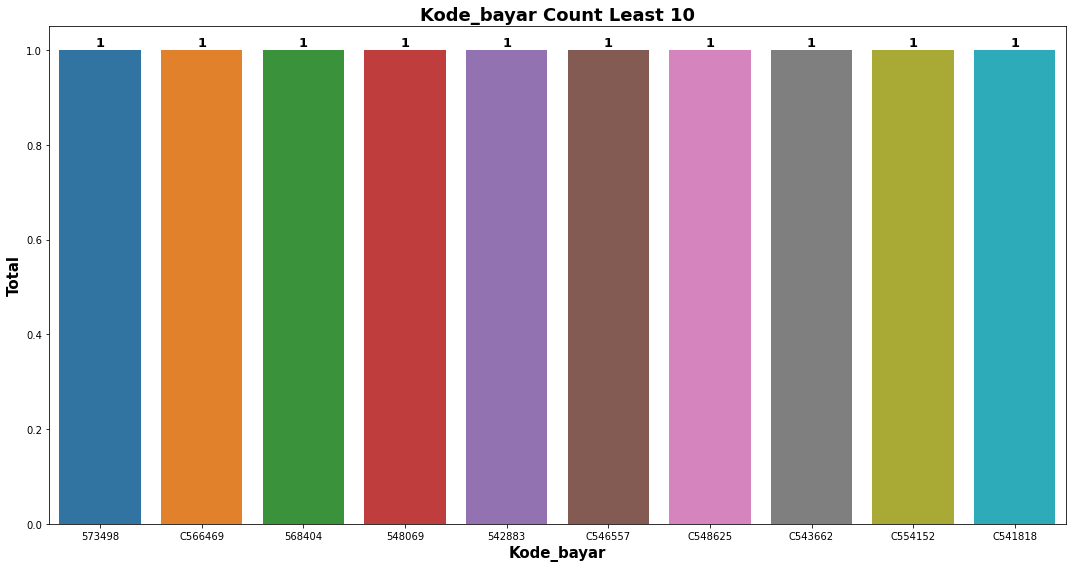

In [67]:
barplot_dfLossCompany(dfLossCompany_category[0])

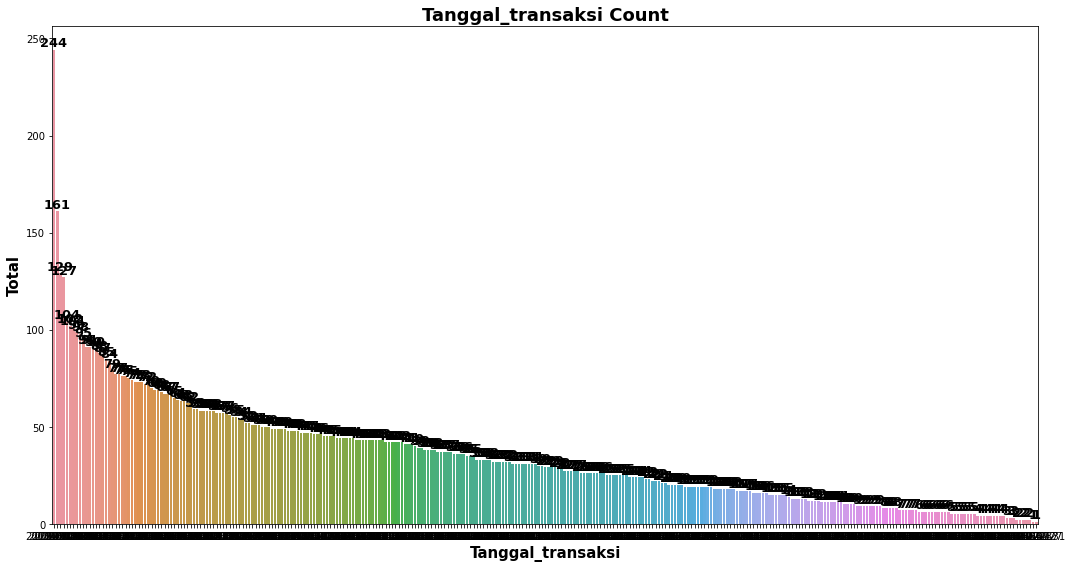

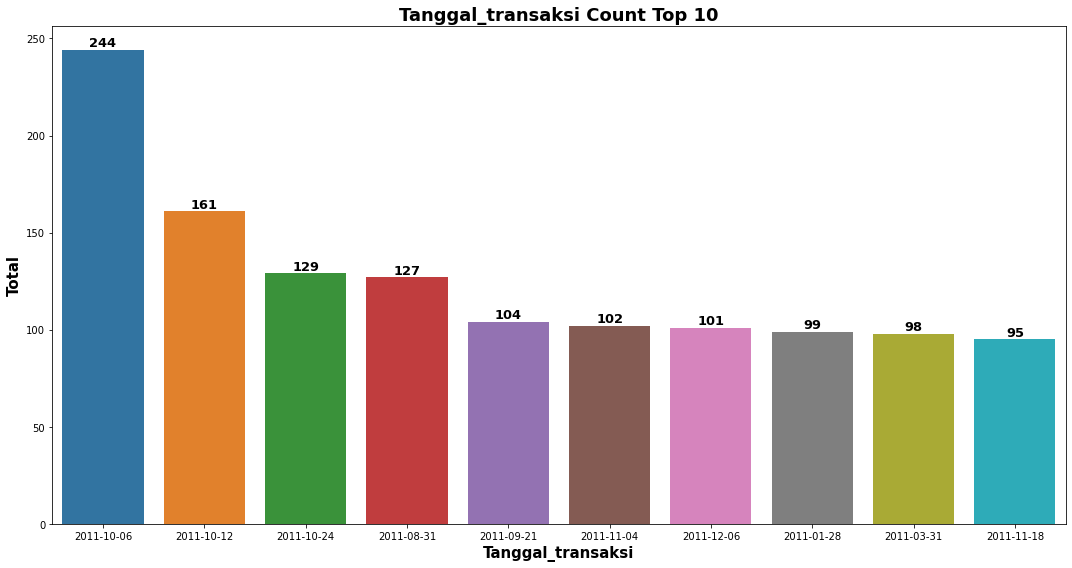

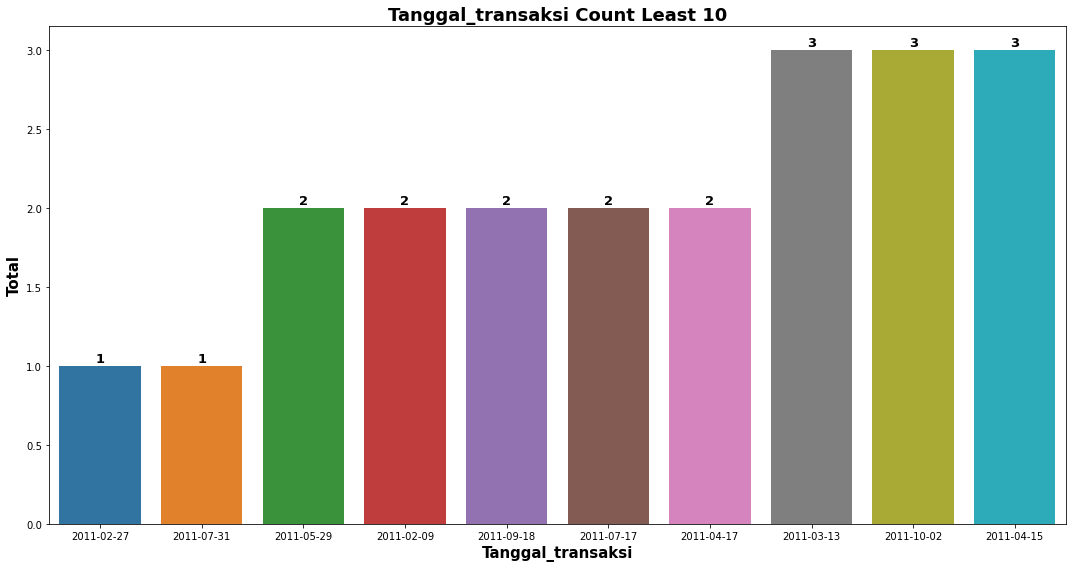

In [68]:
barplot_dfLossCompany(dfLossCompany_category[1])

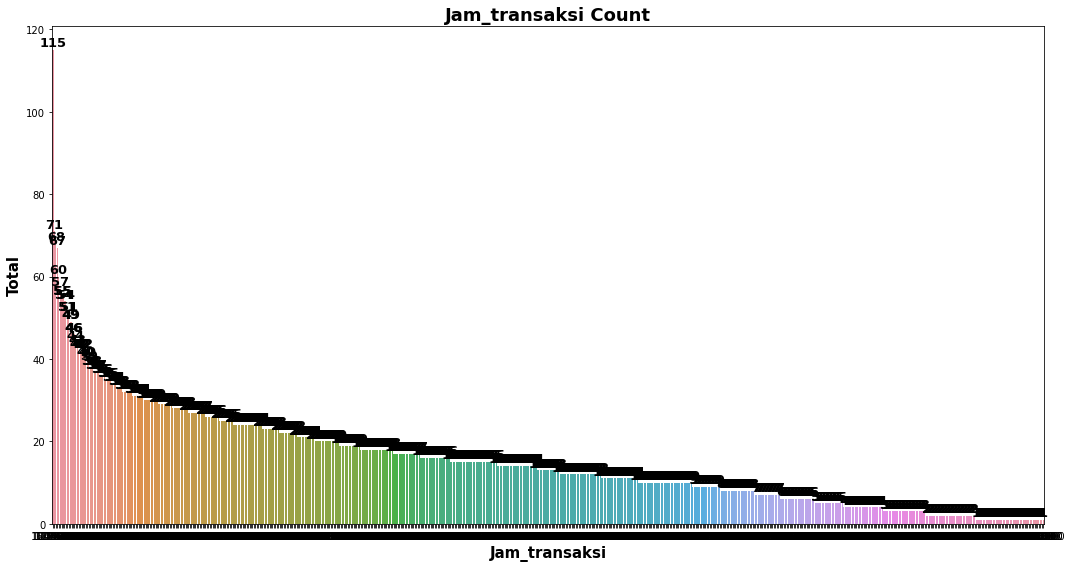

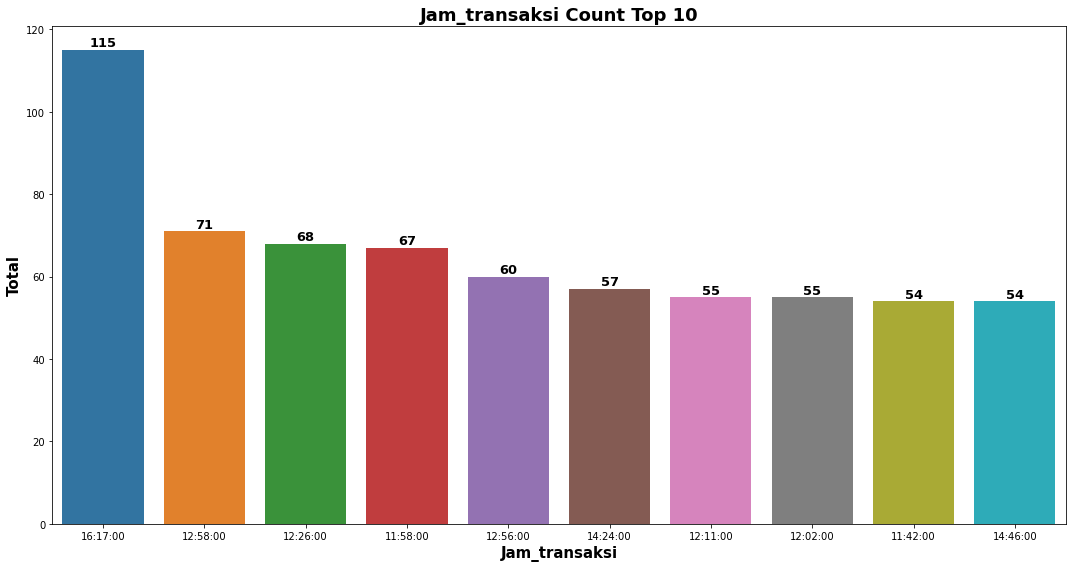

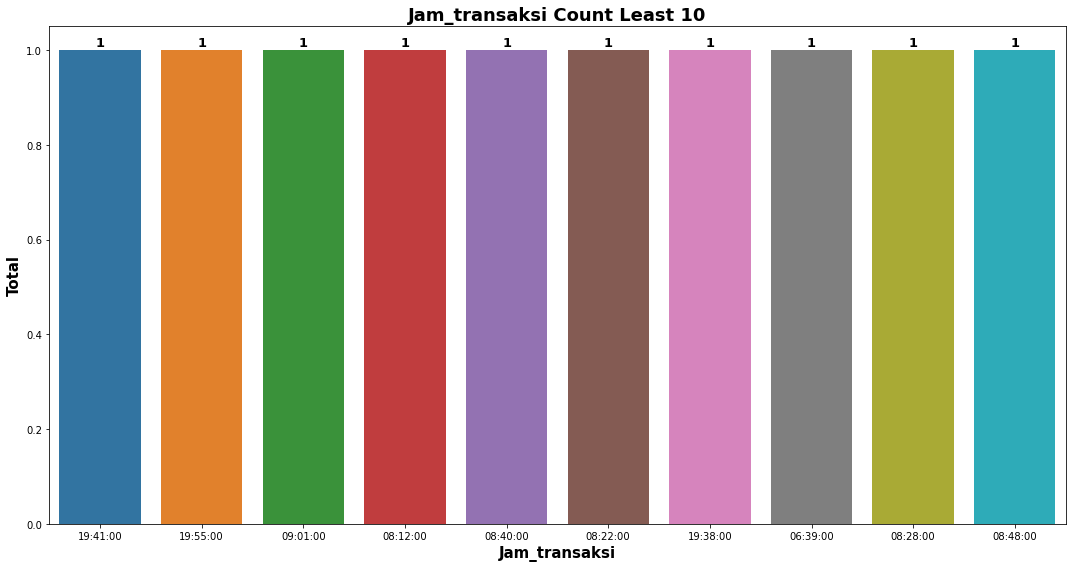

In [69]:
barplot_dfLossCompany(dfLossCompany_category[2])

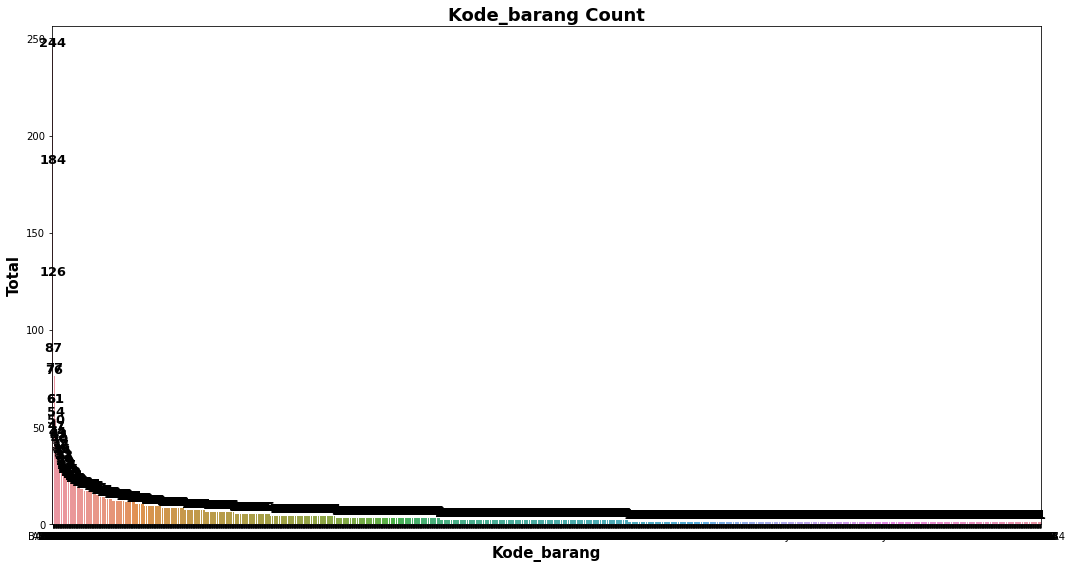

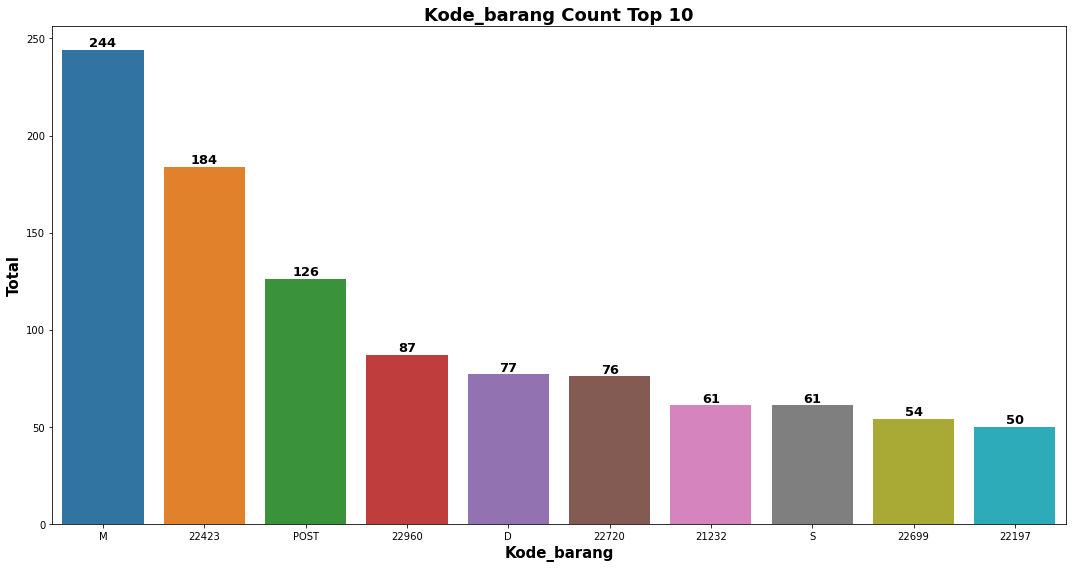

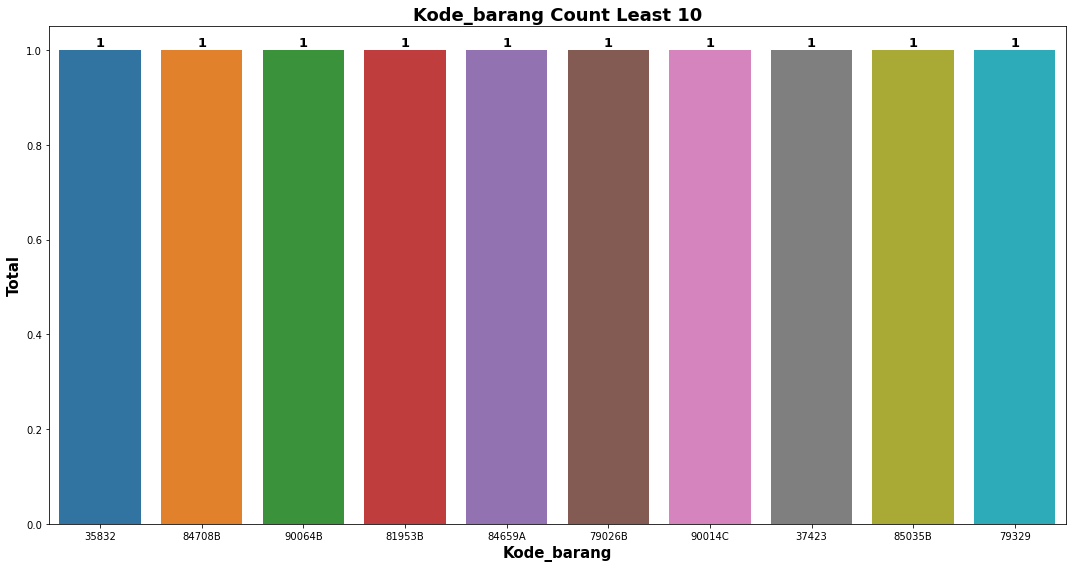

In [70]:
barplot_dfLossCompany(dfLossCompany_category[3])

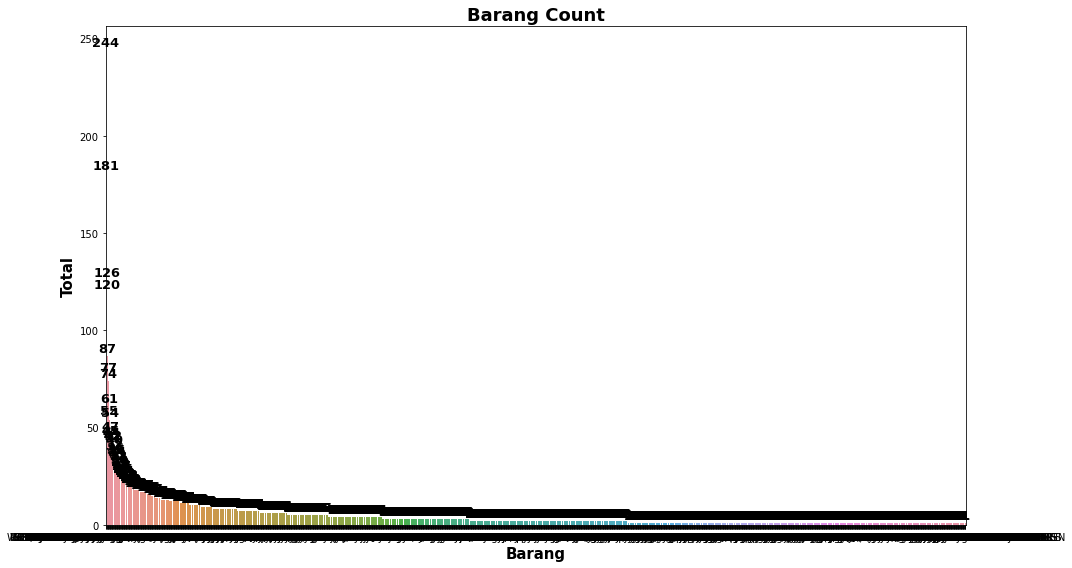

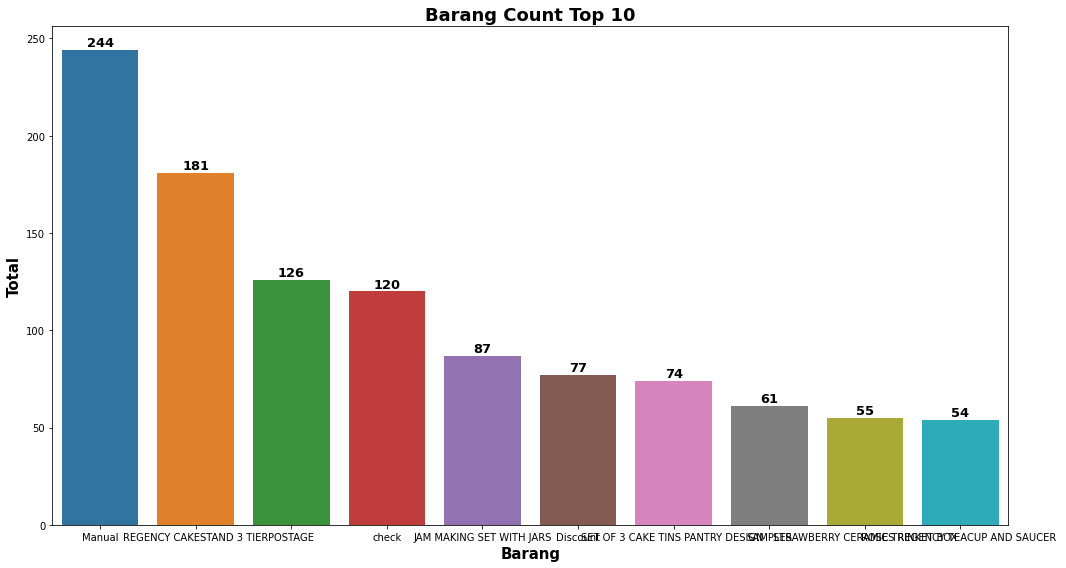

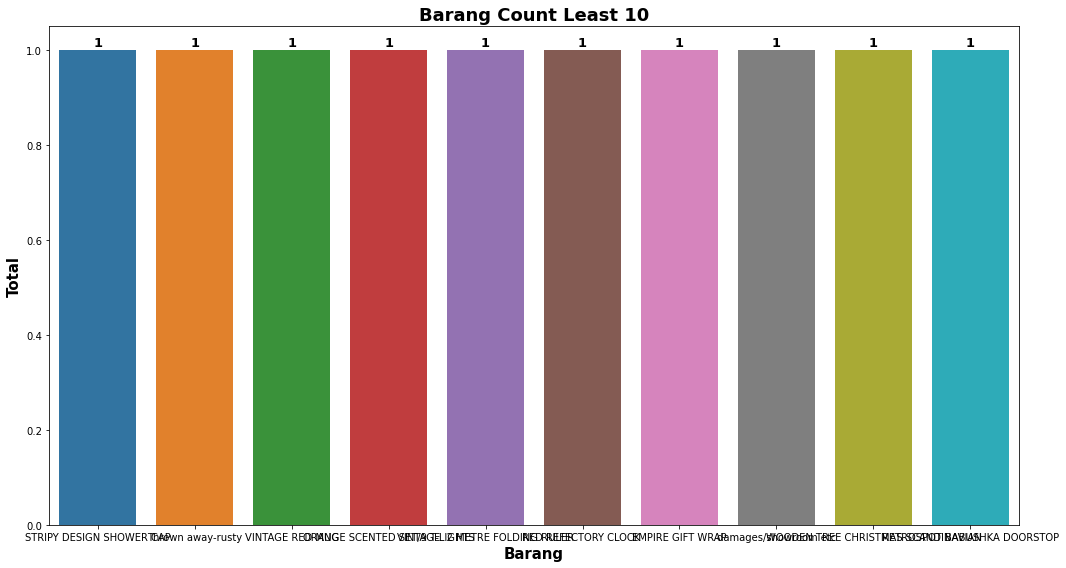

In [71]:
barplot_dfLossCompany(dfLossCompany_category[4])

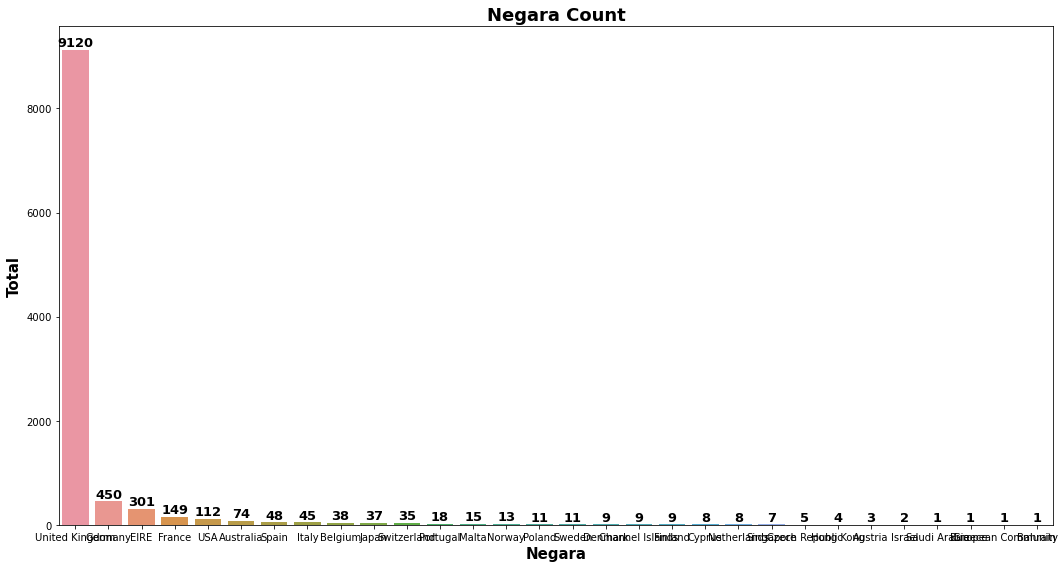

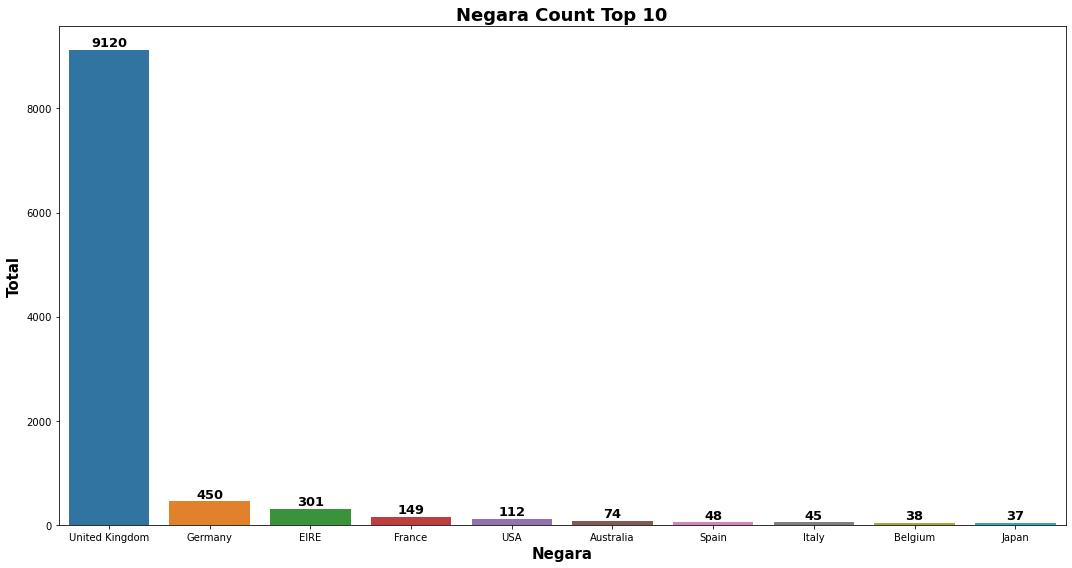

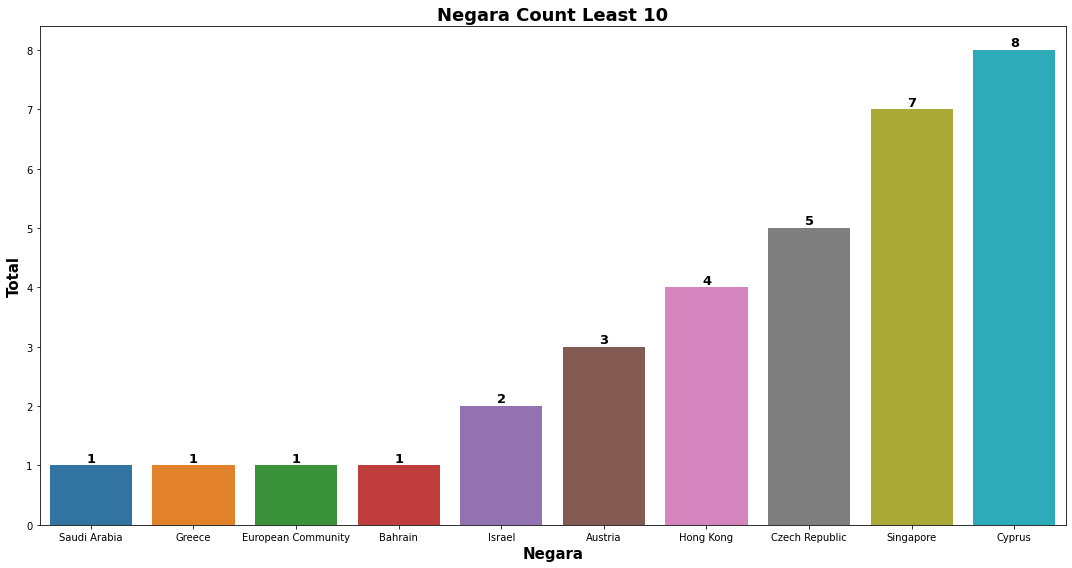

In [72]:
barplot_dfLossCompany(dfLossCompany_category[5])

# Trend Visualization with Time Series

## Trend Visualization on Main DataFrame

In [74]:
df

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
0          536365        2010-12-01      08:26:00      85123A   
1          536365        2010-12-01      08:26:00       71053   
2          536365        2010-12-01      08:26:00      84406B   
3          536365        2010-12-01      08:26:00      84029G   
4          536365        2010-12-01      08:26:00      84029E   
...           ...               ...           ...         ...   
541904     581587        2011-12-09      12:50:00       22613   
541905     581587        2011-12-09      12:50:00       22899   
541906     581587        2011-12-09      12:50:00       23254   
541907     581587        2011-12-09      12:50:00       23255   
541908     581587        2011-12-09      12:50:00       22138   

                                     Barang  Jumlah  Harga_Satuan  \
0        WHITE HANGING HEART T-LIGHT HOLDER     6.0          2.55   
1                       WHITE METAL LANTERN     6.0          3.39   
2            CREAM CUPID HEARTS COAT HANGER     8.0          2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE     6.0          3.39   
4            RED WOOLLY HOTTIE WHITE HEART.     6.0          3.39   
...                                     ...     ...           ...   
541904          PACK OF 20 SPACEBOY NAPKINS    12.0          0.85   
541905         CHILDREN'S APRON DOLLY GIRL      6.0          2.10   
541906        CHILDRENS CUTLERY DOLLY GIRL      4.0          4.15   
541907      CHILDRENS CUTLERY CIRCUS PARADE     4.0          4.15   
541908        BAKING SET 9 PIECE RETROSPOT      3.0          4.95   

        Total_Pembelian  Kode_Pelanggan          Negara  
0                 15.30         17850.0  United Kingdom  
1                 20.34         17850.0  United Kingdom  
2                 22.00         17850.0  United Kingdom  
3                 20.34         17850.0  United Kingdom  
4                 20.34         17850.0  United Kingdom  
...                 ...             ...             ...  
541904            10.20         12680.0          France  
541905            12.60         12680.0          France  
541906            16.60         12680.0          France  
541907            16.60         12680.0          France  
541908            14.85         12680.0          France  

[541909 rows x 10 columns]

### Data Preprocessing

In [94]:
MainDataframeTrend = df[['Tanggal_Transaksi','Jumlah','Harga_Satuan','Total_Pembelian']].copy()
MainDataframeTrend = MainDataframeTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()
MainDataframeTrend

<ipython-input-94-b46b0a44c97d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MainDataframeTrend = MainDataframeTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()


Tanggal_Transaksi  Total_Pembelian   Jumlah  Harga_Satuan
0          2010-12-01         57786.99  26365.0      12697.85
1          2010-12-02         45736.88  20404.0       6775.04
2          2010-12-03         45337.03  14711.0      10991.33
3          2010-12-05         30989.30  16223.0       7803.96
4          2010-12-06         53478.44  21226.0      17534.55
..                ...              ...      ...           ...
300        2011-12-05         57081.81  43314.0      57026.67
301        2011-12-06         53480.69  28696.0      10310.72
302        2011-12-07         74828.44  39398.0       9004.78
303        2011-12-08         81023.14  34027.0      21710.73
304        2011-12-09         31850.50  12829.0       9168.77

[305 rows x 4 columns]

In [95]:
MainDataframeTrend = MainDataframeTrend.set_index('Tanggal_Transaksi')
MainDataframeTrend

Total_Pembelian   Jumlah  Harga_Satuan
Tanggal_Transaksi                                        
2010-12-01                57786.99  26365.0      12697.85
2010-12-02                45736.88  20404.0       6775.04
2010-12-03                45337.03  14711.0      10991.33
2010-12-05                30989.30  16223.0       7803.96
2010-12-06                53478.44  21226.0      17534.55
...                            ...      ...           ...
2011-12-05                57081.81  43314.0      57026.67
2011-12-06                53480.69  28696.0      10310.72
2011-12-07                74828.44  39398.0       9004.78
2011-12-08                81023.14  34027.0      21710.73
2011-12-09                31850.50  12829.0       9168.77

[305 rows x 3 columns]

### Trend on Jumlah by Tanggal Transaksi

Text(0.5, 1.0, 'Jumlah Time Series')

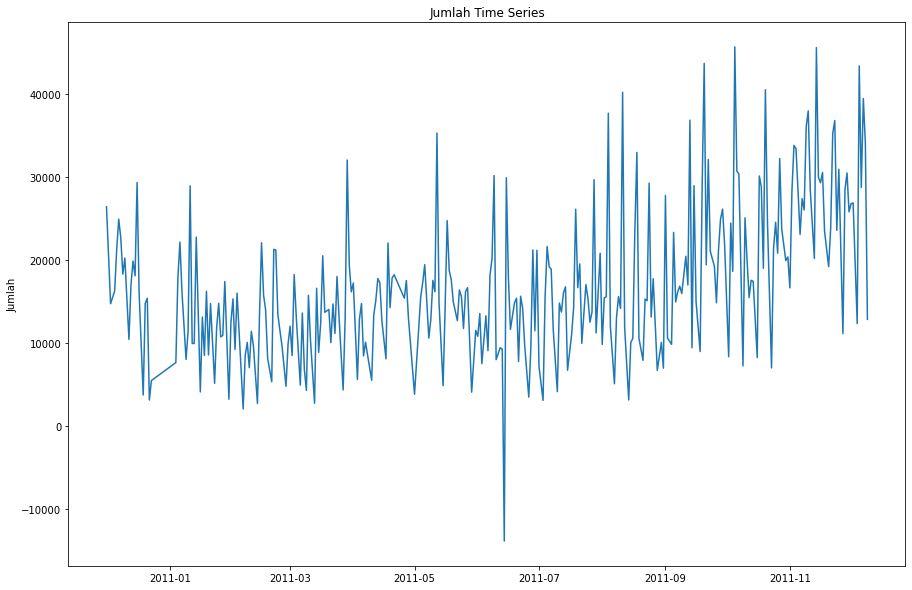

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(MainDataframeTrend.loc[:, 'Jumlah'], linestyle='-')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Time Series')

### Trend on Harga Satuan by Tanggal Transaksi

Text(0.5, 1.0, 'Harga Satuan Time Series')

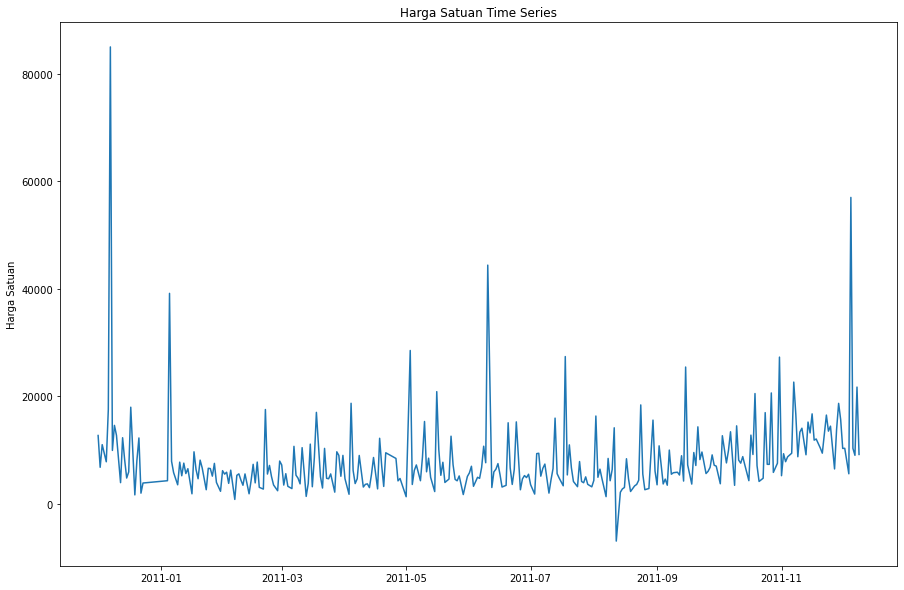

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(MainDataframeTrend.loc[:, 'Harga_Satuan'], linestyle='-')
ax.set_ylabel('Harga Satuan')
ax.set_title('Harga Satuan Time Series')

### Trend on Total Pembelian by Tanggal Transaksi

Text(0.5, 1.0, 'Total Pembelian Time Series')

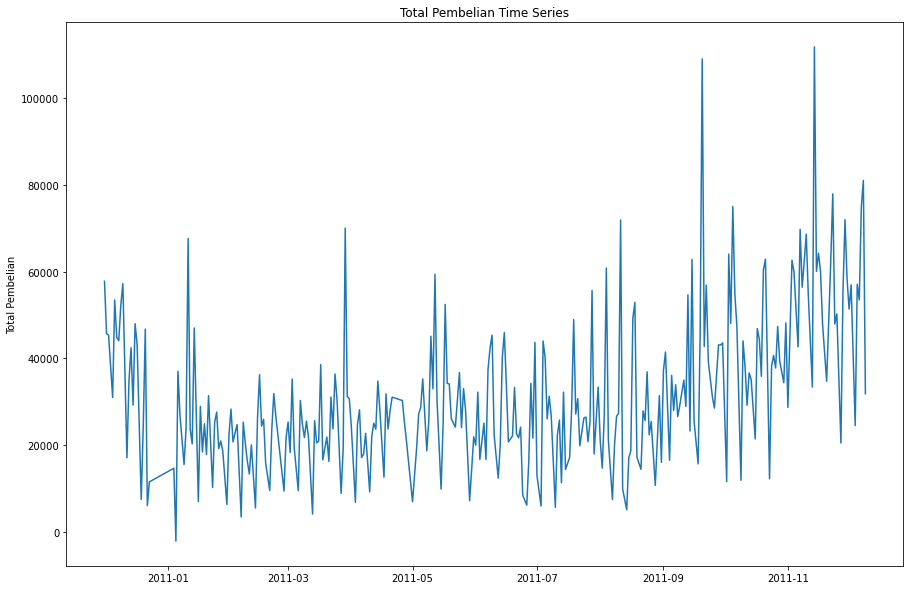

In [109]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(MainDataframeTrend.loc[:, 'Total_Pembelian'], linestyle='-')
ax.set_ylabel('Total Pembelian')
ax.set_title('Total Pembelian Time Series')

## Trend Visualization on dfProfitCompany

In [84]:
dfProfitCompany

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
0          536365        2010-12-01      08:26:00      85123A   
1          536365        2010-12-01      08:26:00       71053   
2          536365        2010-12-01      08:26:00      84406B   
3          536365        2010-12-01      08:26:00      84029G   
4          536365        2010-12-01      08:26:00      84029E   
...           ...               ...           ...         ...   
541904     581587        2011-12-09      12:50:00       22613   
541905     581587        2011-12-09      12:50:00       22899   
541906     581587        2011-12-09      12:50:00       23254   
541907     581587        2011-12-09      12:50:00       23255   
541908     581587        2011-12-09      12:50:00       22138   

                                     Barang  Jumlah  Harga_Satuan  \
0        WHITE HANGING HEART T-LIGHT HOLDER     6.0          2.55   
1                       WHITE METAL LANTERN     6.0          3.39   
2            CREAM CUPID HEARTS COAT HANGER     8.0          2.75   
3       KNITTED UNION FLAG HOT WATER BOTTLE     6.0          3.39   
4            RED WOOLLY HOTTIE WHITE HEART.     6.0          3.39   
...                                     ...     ...           ...   
541904          PACK OF 20 SPACEBOY NAPKINS    12.0          0.85   
541905         CHILDREN'S APRON DOLLY GIRL      6.0          2.10   
541906        CHILDRENS CUTLERY DOLLY GIRL      4.0          4.15   
541907      CHILDRENS CUTLERY CIRCUS PARADE     4.0          4.15   
541908        BAKING SET 9 PIECE RETROSPOT      3.0          4.95   

        Total_Pembelian  Kode_Pelanggan          Negara  
0                 15.30         17850.0  United Kingdom  
1                 20.34         17850.0  United Kingdom  
2                 22.00         17850.0  United Kingdom  
3                 20.34         17850.0  United Kingdom  
4                 20.34         17850.0  United Kingdom  
...                 ...             ...             ...  
541904            10.20         12680.0          France  
541905            12.60         12680.0          France  
541906            16.60         12680.0          France  
541907            16.60         12680.0          France  
541908            14.85         12680.0          France  

[525327 rows x 10 columns]

### Data Preprocessing

In [110]:
ProfitCompanyTrend = dfProfitCompany[['Tanggal_Transaksi','Jumlah','Harga_Satuan','Total_Pembelian']].copy()
ProfitCompanyTrend = ProfitCompanyTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()
ProfitCompanyTrend

<ipython-input-110-68167221c3c7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ProfitCompanyTrend = ProfitCompanyTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()


Tanggal_Transaksi  Total_Pembelian   Jumlah  Harga_Satuan
0          2010-12-01         58110.52  26556.0      12600.63
1          2010-12-02         47277.98  30729.0       6568.51
2          2010-12-03         46660.28  16352.0      10933.18
3          2010-12-05         31380.30  16279.0       7664.01
4          2010-12-06         54448.72  21758.0      17306.52
..                ...              ...      ...           ...
300        2011-12-05         88072.45  43859.0      26407.98
301        2011-12-06         55904.33  30115.0       9931.80
302        2011-12-07         75191.38  41766.0       8760.73
303        2011-12-08         82095.41  35238.0      21440.15
304        2011-12-09         32169.97  12864.0       8927.85

[305 rows x 4 columns]

In [111]:
ProfitCompanyTrend = ProfitCompanyTrend.set_index('Tanggal_Transaksi')
ProfitCompanyTrend

Total_Pembelian   Jumlah  Harga_Satuan
Tanggal_Transaksi                                        
2010-12-01                58110.52  26556.0      12600.63
2010-12-02                47277.98  30729.0       6568.51
2010-12-03                46660.28  16352.0      10933.18
2010-12-05                31380.30  16279.0       7664.01
2010-12-06                54448.72  21758.0      17306.52
...                            ...      ...           ...
2011-12-05                88072.45  43859.0      26407.98
2011-12-06                55904.33  30115.0       9931.80
2011-12-07                75191.38  41766.0       8760.73
2011-12-08                82095.41  35238.0      21440.15
2011-12-09                32169.97  12864.0       8927.85

[305 rows x 3 columns]

### Trend on Jumlah by Tanggal Transaksi

Text(0.5, 1.0, 'Jumlah Time Series')

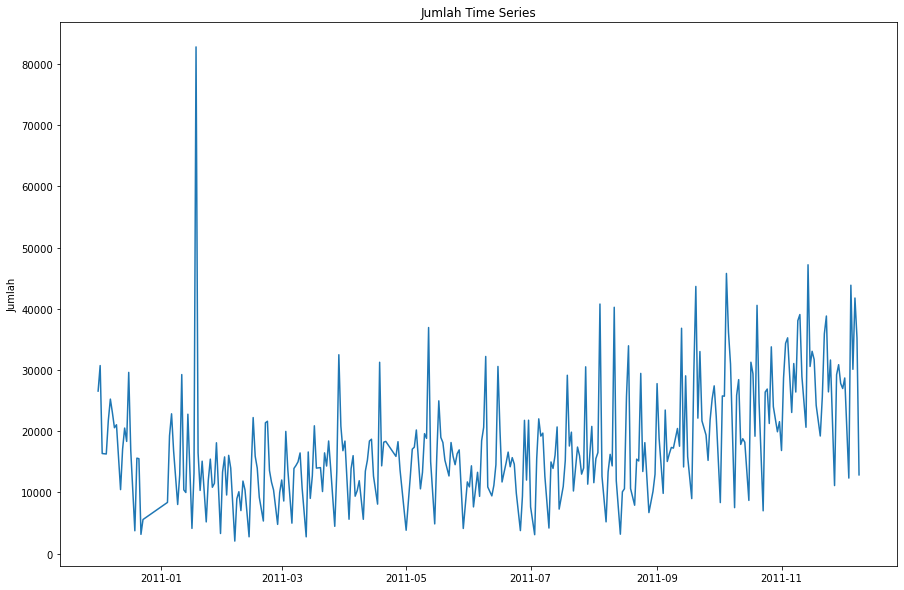

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ProfitCompanyTrend.loc[:, 'Jumlah'], linestyle='-')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Time Series')

### Trend on Harga Satuan by Tanggal Transaksi

Text(0.5, 1.0, 'Harga Satuan Time Series')

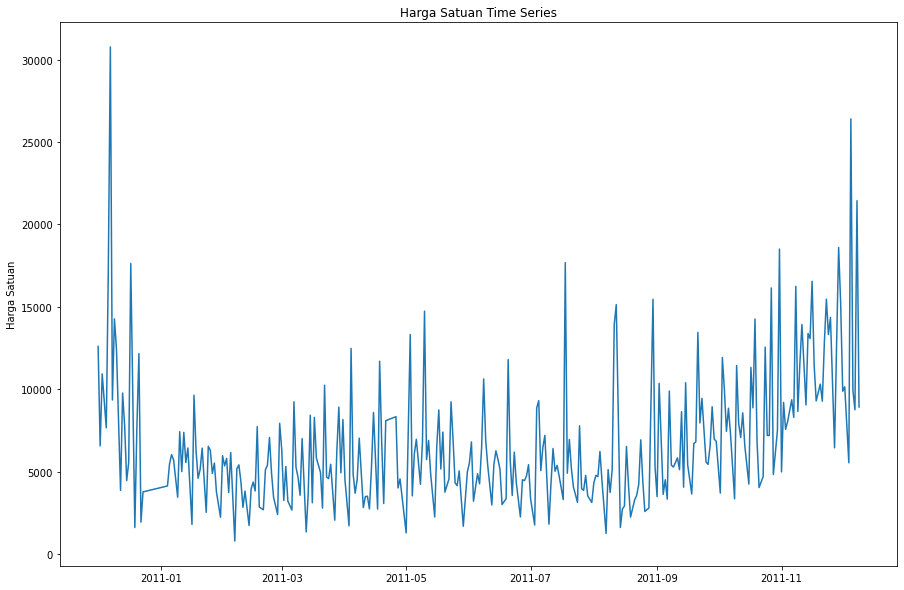

In [113]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ProfitCompanyTrend.loc[:, 'Harga_Satuan'], linestyle='-')
ax.set_ylabel('Harga Satuan')
ax.set_title('Harga Satuan Time Series')

### Trend on Total Pembelian by Tanggal Transaksi

Text(0.5, 1.0, 'Total Pembelian Time Series')

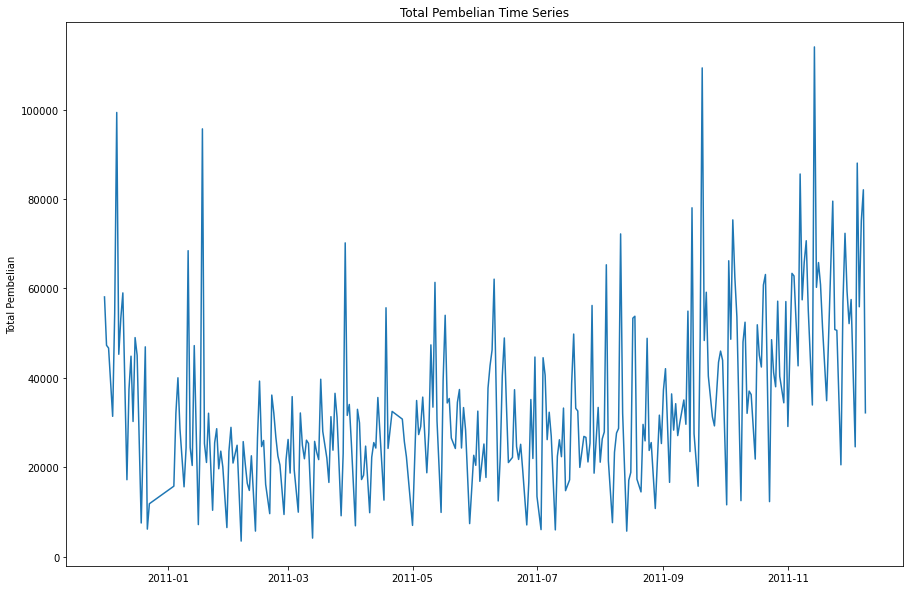

In [114]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(ProfitCompanyTrend.loc[:, 'Total_Pembelian'], linestyle='-')
ax.set_ylabel('Total Pembelian')
ax.set_title('Total Pembelian Time Series')

## Trend Visualization on dfLossCompany

In [115]:
dfLossCompany

Kode_Bayar Tanggal_Transaksi Jam_Transaksi Kode_Barang  \
141       C536379        2010-12-01      09:41:00           D   
154       C536383        2010-12-01      09:49:00      35004C   
235       C536391        2010-12-01      10:24:00       22556   
236       C536391        2010-12-01      10:24:00       21984   
237       C536391        2010-12-01      10:24:00       21983   
...           ...               ...           ...         ...   
540449    C581490        2011-12-09      09:57:00       23144   
541541    C581499        2011-12-09      10:28:00           M   
541715    C581568        2011-12-09      11:57:00       21258   
541716    C581569        2011-12-09      11:58:00       84978   
541717    C581569        2011-12-09      11:58:00       20979   

                                  Barang  Jumlah  Harga_Satuan  \
141                             Discount    -1.0         27.50   
154      SET OF 3 COLOURED  FLYING DUCKS    -1.0          4.65   
235       PLASTERS IN TIN CIRCUS PARADE    -12.0          1.65   
236     PACK OF 12 PINK PAISLEY TISSUES    -24.0          0.29   
237     PACK OF 12 BLUE PAISLEY TISSUES    -24.0          0.29   
...                                  ...     ...           ...   
540449   ZINC T-LIGHT HOLDER STARS SMALL   -11.0          0.83   
541541                            Manual    -1.0        224.69   
541715        VICTORIAN SEWING BOX LARGE    -5.0         10.95   
541716  HANGING HEART JAR T-LIGHT HOLDER    -1.0          1.25   
541717     36 PENCILS TUBE RED RETROSPOT    -5.0          1.25   

        Total_Pembelian  Kode_Pelanggan          Negara  
141              -27.50         14527.0  United Kingdom  
154               -4.65         15311.0  United Kingdom  
235              -19.80         17548.0  United Kingdom  
236               -6.96         17548.0  United Kingdom  
237               -6.96         17548.0  United Kingdom  
...                 ...             ...             ...  
540449            -9.13         14397.0  United Kingdom  
541541          -224.69         15498.0  United Kingdom  
541715           -54.75         15311.0  United Kingdom  
541716            -1.25         17315.0  United Kingdom  
541717            -6.25         17315.0  United Kingdom  

[10545 rows x 10 columns]

### Data Preprocessing

In [116]:
LossCompanyTrend = dfLossCompany[['Tanggal_Transaksi','Jumlah','Harga_Satuan','Total_Pembelian']].copy()
LossCompanyTrend = LossCompanyTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()
LossCompanyTrend

<ipython-input-116-559b856113e0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  LossCompanyTrend = LossCompanyTrend.groupby(['Tanggal_Transaksi'])['Total_Pembelian','Jumlah','Harga_Satuan'].sum().reset_index()


Tanggal_Transaksi  Total_Pembelian   Jumlah  Harga_Satuan
0          2010-12-01          -323.53   -191.0         97.22
1          2010-12-02         -1541.10 -10325.0        206.53
2          2010-12-03         -1323.25  -1641.0         58.15
3          2010-12-05          -391.00    -56.0        139.95
4          2010-12-06          -970.28   -532.0        228.03
..                ...              ...      ...           ...
298        2011-12-05        -30990.64   -545.0      30618.69
299        2011-12-06         -2423.64  -1419.0        378.92
300        2011-12-07          -362.94  -2368.0        244.05
301        2011-12-08         -1072.27  -1211.0        270.58
302        2011-12-09          -319.47    -35.0        240.92

[303 rows x 4 columns]

In [117]:
LossCompanyTrend = LossCompanyTrend.set_index('Tanggal_Transaksi')
LossCompanyTrend

Total_Pembelian   Jumlah  Harga_Satuan
Tanggal_Transaksi                                        
2010-12-01                 -323.53   -191.0         97.22
2010-12-02                -1541.10 -10325.0        206.53
2010-12-03                -1323.25  -1641.0         58.15
2010-12-05                 -391.00    -56.0        139.95
2010-12-06                 -970.28   -532.0        228.03
...                            ...      ...           ...
2011-12-05               -30990.64   -545.0      30618.69
2011-12-06                -2423.64  -1419.0        378.92
2011-12-07                 -362.94  -2368.0        244.05
2011-12-08                -1072.27  -1211.0        270.58
2011-12-09                 -319.47    -35.0        240.92

[303 rows x 3 columns]

### Trend on Jumlah by Tanggal Transaksi

Text(0.5, 1.0, 'Jumlah Time Series')

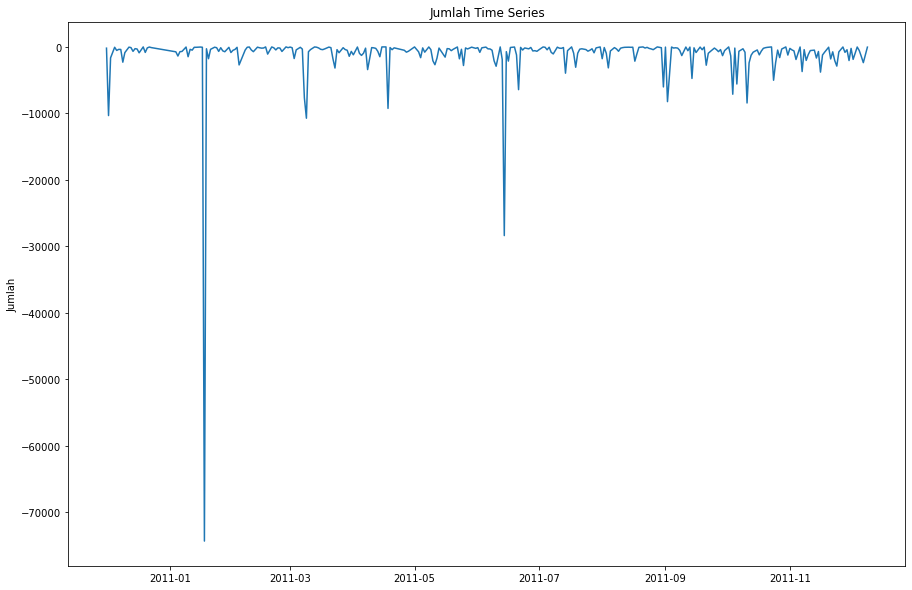

In [118]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(LossCompanyTrend.loc[:, 'Jumlah'], linestyle='-')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Time Series')

### Trend on Harga Satuan by Tanggal Transaksi

Text(0.5, 1.0, 'Harga Satuan Time Series')

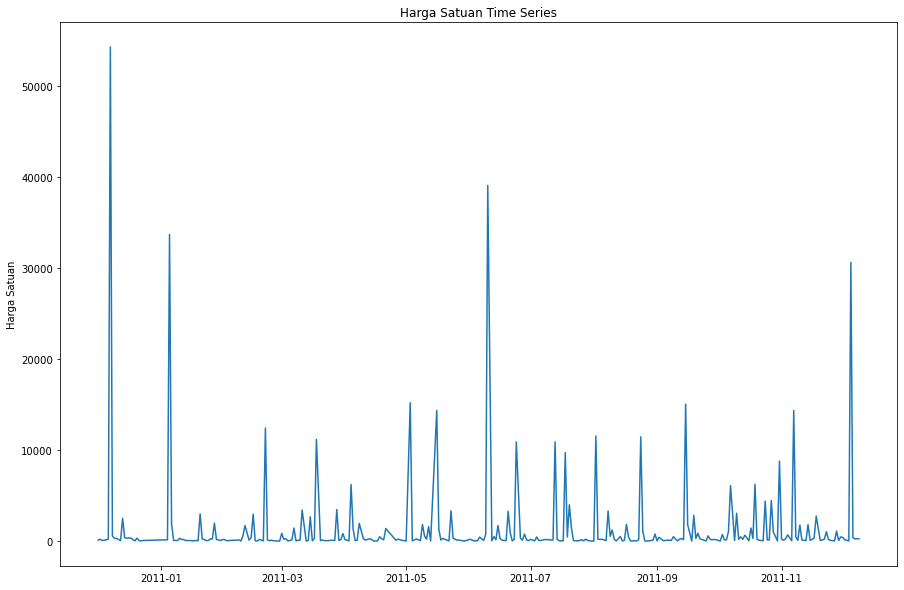

In [119]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(LossCompanyTrend.loc[:, 'Harga_Satuan'], linestyle='-')
ax.set_ylabel('Harga Satuan')
ax.set_title('Harga Satuan Time Series')

### Trend on Total Pembelian by Tanggal Transaksi

Text(0.5, 1.0, 'Total Pembelian Time Series')

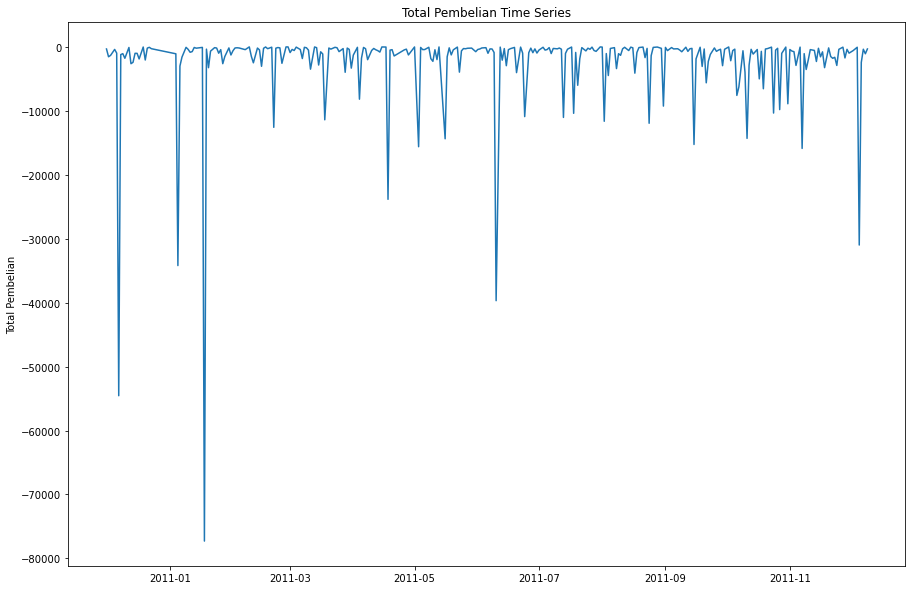

In [120]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(LossCompanyTrend.loc[:, 'Total_Pembelian'], linestyle='-')
ax.set_ylabel('Total Pembelian')
ax.set_title('Total Pembelian Time Series')